# Title of the analysis:

# *Analytical description of customer-orders on a food-delivery app that includes recommendations on how the app can increase its service-quality metrics as assessed by their customers, followed by the completion of a multivariate analysis of variance and concluded with the computation of a machine learning model predicting what customers' preferences and opinions as pertaining to the delivery service would be from their order attributes and demographical features alone.*

# Description of the dataset's columns:

Can be found on this link: https://www.kaggle.com/datasets/benroshan/online-food-delivery-preferencesbangalore-region

# Index of the analysis:

<ins> 1. Data Preprocessing for Exploratory Data Analysis </ins>

- 1.a) Top-level understanding of the dataset

- 1.b) Treatment of missing values via sentiment analysis of 'Reviews' column

- 1.c) Elimination of duplicate rows

- 1.d) Transformation of categorical variables into numerical ones

- 1.e) Feature engineering

<ins> 2. Exploratory Data Analysis </ins>

- 2.a) Histogram display for the occurence-frequency of each numerical columns' values

- 2.b) Boxplot display for the dispersion of each numerical columns' values

- 2.c) Relation between selected independent and dependent variables of the dataset

- 2.d) Pivot table indicating the top 20 orders with the greatest customer overall review

<ins> 3. Data Preprocessing for Machine Learning </ins>

- 3.a) Outlier elimination

- 3.b) Distribution fitting via standardization and dimensionality reduction via factor analysis

- 3.c) Canonical correlation analysis

<ins> 4. Multivariate Analysis Of Variance (MANOVA) </ins>

<ins> 5. Machine Learning Model predicting Customer Preferences and Opinions on the Service </ins>

# 1. Data Preprocessing

## <ins>1.a) Top-level understanding of the dataset</ins>

In [124]:
import pandas as pd

file_path = '/Users/goncalolazaro/Downloads/onlinedeliverydata.csv'

pd.set_option('display.max_columns', None)

df = pd.read_csv(file_path)

df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [126]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


## <ins>1.b) Treatment of missing values via sentiment analysis of 'Reviews' column</ins>

In [127]:
# Checking for missing values in the dataset:

nan_values = df.isna()

any_missing_values = nan_values.any()

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

# Count the number of null values in each column
null_counts = df.isnull().sum()

print("Number of null values in each column:")
print(null_counts)


Missing Values in the Entire DataFrame?
Age                                          False
Gender                                       False
Marital Status                               False
Occupation                                   False
Monthly Income                               False
Educational Qualifications                   False
Family size                                  False
latitude                                     False
longitude                                    False
Pin code                                     False
Medium (P1)                                  False
Medium (P2)                                  False
Meal(P1)                                     False
Meal(P2)                                     False
Perference(P1)                               False
Perference(P2)                               False
Ease and convenient                          False
Time saving                                  False
More restaurant choices                  

## How I'm treating the missing data

- For column "Reviews", which displays the service-reviews the customers left on each of their orders (if existing), I will conduct Sentiment Analysis that'll categorize each review as "Positive", "Negative" or "No Review", effectively keeping the null values on my dataframe (by null values I'm considering both the one empty review and all reviews constituted by any of the following: 'Nil\n', 'Nil', 'nil', 'NIL', 'Nill\n', 'Nill', 'nill', 'NILL', 'Nul\n', 'Nul', 'nul', 'NUL', 'Null\n', 'Null', 'null', 'NULL').

In [128]:
# Treating the missing data on the 'Reviews' column by conducting Sentiment Analysis

from textblob import TextBlob

no_review_keywords = ['Nil\n', 'Nil', 'nil', 'NIL']
df['Sentiment'] = 'No Review'
df.loc[df['Reviews'].isin(no_review_keywords), 'Sentiment'] = 'No Review'

def get_sentiment(text):
    if pd.isnull(text):
        return None
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

mask = ~df['Reviews'].isin(no_review_keywords) & ~df['Reviews'].isnull()
df.loc[mask, 'Sentiment'] = df.loc[mask, 'Reviews'].apply(get_sentiment)

print(df)

     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

## <ins>1.c) Elimination of duplicate rows</ins>

In [129]:
# Checking for any duplicate rows and removing them

df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

## <ins>1.d) Transformation of categorical variables into numerical ones</ins>

We do so because having categorical variables turned into numerical ones enables analyses of those that would otherwise be impossible. Examples of such would be correlation analysis or predictive modeling.

Before we carry out that transformation we should understand if, for each column containing categorical variables, there is a ranking between the latter or not, as that will influence how the turn to numerical will take place:

- when a ranking exists, no new columns will be created, instead the categorical-variables column will be turned numerical
- when a ranking doesn't exist, new columns will be created, one per categorical variables, and the original column with the categorical variables should be deleted

Moreover, for categorical columns that appear to have a large number of unique values, it would be sound to understand the sheer scale of those unique values to therefore know if it'd make sense to clusterize those into smaller, hence manageable, groups, before the turn to numerical happens.

In [130]:
# Firstly, for the non-numerical columns whose values hold no ranking between themselves, we'll start the process of turning those values to numerical by doing one-hot encoding, as follows:

df = pd.get_dummies(df, columns=['Gender', 'Marital Status', 'Occupation', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Order Time'], prefix=['Gender', 'Marital Status', 'Occupation', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Order Time'])

df.head()

,Age,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews,Sentiment,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Employee,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Medium (P1)_Direct call,Medium (P1)_Food delivery apps,Medium (P1)_Walk-in,Medium (P1)_Web browser,Medium (P2)_ Direct call,Medium (P2)_ Walk-in,Medium (P2)_ Web browser,Meal(P1)_Breakfast,Meal(P1)_Dinner,Meal(P1)_Lunch,Meal(P1)_Snacks,Meal(P2)_ Dinner,Meal(P2)_ Lunch,Meal(P2)_ Snacks,Perference(P1)_Bakery items (snacks),Perference(P1)_Non Veg foods (Lunch / Dinner),Perference(P1)_Sweets,Perference(P1)_Veg foods (Breakfast / Lunch / Dinner),Perference(P2)_ Bakery items (snacks),Perference(P2)_ Ice cream / Cool drinks,Perference(P2)_ Sweets,Perference(P2)_ Veg foods (Breakfast / Lunch / Dinner),Order Time_Anytime (Mon-Sun),Order Time_Weekdays (Mon-Fri),Order Time_Weekend (Sat & Sun)
0,20,No Income,Post Graduate,4,12.9766,77.5993,560001,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n,No Review,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
1,24,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil,No Review,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,True,False,False
2,22,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so...",Positive,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False
3,22,No Income,Graduate,6,12.9473,77.5616,560019,Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,30 minutes,Disagree,Agree,Agree,Neutral,Agre

In [131]:
# And we end the process of turning non-numerical columns whose values hold no ranking between themselves by now turning the 'True' and 'False' values of the newly formed columns into 1's and 0's (respectively), as follows:

binary_columns=['Gender_Female', 'Gender_Male', 'Marital Status_Married', 'Marital Status_Prefer not to say', 'Marital Status_Single', 'Occupation_Employee', 'Occupation_House wife', 'Occupation_Self Employeed', 'Occupation_Student', 'Medium (P1)_Direct call', 'Medium (P1)_Food delivery apps', 'Medium (P1)_Walk-in', 'Medium (P1)_Web browser', 'Medium (P2)_ Direct call', 'Medium (P2)_ Walk-in', 'Medium (P2)_ Web browser', 'Meal(P1)_Breakfast', 'Meal(P1)_Dinner', 'Meal(P1)_Lunch', 'Meal(P1)_Snacks', 'Meal(P2)_ Dinner', 'Meal(P2)_ Lunch', 'Meal(P2)_ Snacks', 'Perference(P1)_Bakery items (snacks)', 'Perference(P1)_Non Veg foods (Lunch / Dinner)', 'Perference(P1)_Sweets', 'Perference(P1)_Veg foods (Breakfast / Lunch / Dinner)', 'Perference(P2)_ Bakery items (snacks)', 'Perference(P2)_ Ice cream / Cool drinks', 'Perference(P2)_ Sweets', 'Perference(P2)_ Veg foods (Breakfast / Lunch / Dinner)', 'Order Time_Anytime (Mon-Sun)', 'Order Time_Weekdays (Mon-Fri)', 'Order Time_Weekend (Sat & Sun)']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

for column in binary_columns:
    df[column] = df[column].astype(float) 
print(df.head())

   Age  Monthly Income Educational Qualifications  Family size  latitude  \
0   20       No Income              Post Graduate            4   12.9766   
1   24  Below Rs.10000                   Graduate            3   12.9770   
2   22  Below Rs.10000              Post Graduate            3   12.9551   
3   22       No Income                   Graduate            6   12.9473   
4   22  Below Rs.10000              Post Graduate            4   12.9850   

   longitude  Pin code Ease and convenient     Time saving  \
0    77.5993    560001             Neutral         Neutral   
1    77.5773    560009      Strongly agree  Strongly agree   
2    77.6593    560017      Strongly agree  Strongly agree   
3    77.5616    560019               Agree           Agree   
4    77.5533    560010               Agree           Agree   

  More restaurant choices Easy Payment option More Offers and Discount  \
0                 Neutral             Neutral                  Neutral   
1          Strongly ag

In [132]:
# We now move forward to turning the non-numerical columns whose values hold a ranking between themselves to numerical, as follows:

# Defining a mapping for the categorical values to numerical scales

mapping = {
    'Strongly disagree': -2, 'Strongly Disagree': -2, 'Disagree': -1, 'Neutral': 0, 'Agree': 1, 'Strongly Agree': 2, 'Strongly agree': 2,
    'Yes': 1, 'No': -1, 'Maybe': 0,
    'Unimportant': -1, 'Slightly Important': 0, 'Moderately Important': 0, 'Important': 1, 'Very Important': 2,
    '15 minutes': 0, '30 minutes': 0.5, '45 minutes': 1, '60 minutes': 1.5, 'More than 60 minutes': 2,
    'No Income': 0, 'Below Rs.10000': 0.5, '10001 to 25000': 1, '25001 to 50000': 1.5, 'More than 50000': 2,
    'Uneducated': 0, 'School': 0.5, 'Graduate': 1, 'Post Graduate': 1.5, 'Ph.D': 2,
    'Positive': 1, 'Negative': -1, 'No Review': 0
}

# Columns with non-numeric data whose values hold rankings between themselves

non_numeric_columns_ranking = [
    'Ease and convenient',
    'Time saving',
    'More restaurant choices', 
    'Easy Payment option',
    'More Offers and Discount',
    'Good Food quality', 
    'Good Tracking system',
    'Self Cooking',
    'Health Concern',
    'Late Delivery',
    'Poor Hygiene', 
    'Bad past experience',
    'Unavailability',
    'Unaffordable',
    'Long delivery time', 
    'Delay of delivery person getting assigned',
    'Delay of delivery person picking up food',
    'Wrong order delivered',
    'Missing item',
    'Order placed by mistake',
    'Residence in busy location',
    'Google Maps Accuracy',
    'Good Road Condition',
    'Low quantity low time',
    'Delivery person ability',
    'Influence of time',
    'Maximum wait time',
    'Influence of rating',
    'Less Delivery time',
    'High Quality of package',
    'Number of calls',
    'Politeness',
    'Freshness ',
    'Temperature',
    'Good Taste ',
    'Good Quantity',
    'Monthly Income',
    'Educational Qualifications',
    'Output',
    'Sentiment'
]

# Applying the mapping to the non-numeric columns in correlation_df

for col in non_numeric_columns_ranking:
    df[col] = df[col].map(mapping)

df.head()

,Age,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews,Sentiment,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Employee,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Medium (P1)_Direct call,Medium (P1)_Food delivery apps,Medium (P1)_Walk-in,Medium (P1)_Web browser,Medium (P2)_ Direct call,Medium (P2)_ Walk-in,Medium (P2)_ Web browser,Meal(P1)_Breakfast,Meal(P1)_Dinner,Meal(P1)_Lunch,Meal(P1)_Snacks,Meal(P2)_ Dinner,Meal(P2)_ Lunch,Meal(P2)_ Snacks,Perference(P1)_Bakery items (snacks),Perference(P1)_Non Veg foods (Lunch / Dinner),Perference(P1)_Sweets,Perference(P1)_Veg foods (Breakfast / Lunch / Dinner),Perference(P2)_ Bakery items (snacks),Perference(P2)_ Ice cream / Cool drinks,Perference(P2)_ Sweets,Perference(P2)_ Veg foods (Breakfast / Lunch / Dinner),Order Time_Anytime (Mon-Sun),Order Time_Weekdays (Mon-Fri),Order Time_Weekend (Sat & Sun)
0,20,0.0,1.5,4,12.9766,77.5993,560001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Nil\n,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24,0.5,1.0,3,12.9770,77.5773,560009,2.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.5,2.0,0.0,-1.0,-2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,Nil,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,22,0.5,1.5,3,12.9551,77.6593,560017,2.0,2.0,2.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,1.0,2.0,0.0,1.0,"Many a times payment gateways are an issue, so...",1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,22,0.0,1.0,6,12.9473,77.5616,560019,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,0.0,1.0,0.5,-1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,nil,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,22,0.5,1.5,4,12.9850,77.5533,560010,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,0.0,0.0,0.0,-1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,NIL,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## <ins>1.e) Feature engineering</ins>

We will compute one new column compiling all the quality metrics presented in the dataframe into one aggregator that we're calling "Customer Overall Review".

This new metric will be, for any given customer, a simple average of his/hers opinions as given in the following columns:

- Ease and convenient
- Time saving
- More restaurant choices 
- Easy Payment option
- More Offers and Discount
- Good Food quality 
- Good Tracking system
- Self Cooking
- Health Concern
- Late Delivery
- Poor Hygiene 
- Bad past experience
- Unavailability
- Unaffordable
- Long delivery time 
- Delay of delivery person getting assigned
- Delay of delivery person picking up food
- Wrong order delivered
- Missing item
- Order placed by mistake
- Residence in busy location
- Google Maps Accuracy
- Good Road Condition
- Low quantity low time
- Delivery person ability
- Maximum wait time
- Monthly Income
- Educational Qualifications
- Output
- Sentiment

Note: the "Sentiment" column will only be considered as part of the mean if the customer left a review

In [133]:
# All columns showing the customers' opinions on the service

quality_metrics = [
    "Ease and convenient",
    "Time saving",
    "More restaurant choices",
    "Easy Payment option",
    "More Offers and Discount",
    "Good Food quality",
    "Good Tracking system",
    "Self Cooking",
    "Health Concern",
    "Late Delivery",
    "Poor Hygiene",
    "Bad past experience",
    "Unavailability",
    "Unaffordable",
    "Long delivery time",
    "Delay of delivery person getting assigned",
    "Delay of delivery person picking up food",
    "Wrong order delivered",
    "Missing item",
    "Order placed by mistake",
    "Maximum wait time",
    "Google Maps Accuracy",
    "Low quantity low time",
    "Delivery person ability",
    "Output",
    "Sentiment"
]

# Calculating "Customer Overall Review"

df['Customer Overall Review'] = df[quality_metrics].mean(axis=1)

df['Customer Overall Review'] = (df['Customer Overall Review'] * 100).round(0)

df.head()

,Age,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews,Sentiment,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Employee,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Medium (P1)_Direct call,Medium (P1)_Food delivery apps,Medium (P1)_Walk-in,Medium (P1)_Web browser,Medium (P2)_ Direct call,Medium (P2)_ Walk-in,Medium (P2)_ Web browser,Meal(P1)_Breakfast,Meal(P1)_Dinner,Meal(P1)_Lunch,Meal(P1)_Snacks,Meal(P2)_ Dinner,Meal(P2)_ Lunch,Meal(P2)_ Snacks,Perference(P1)_Bakery items (snacks),Perference(P1)_Non Veg foods (Lunch / Dinner),Perference(P1)_Sweets,Perference(P1)_Veg foods (Breakfast / Lunch / Dinner),Perference(P2)_ Bakery items (snacks),Perference(P2)_ Ice cream / Cool drinks,Perference(P2)_ Sweets,Perference(P2)_ Veg foods (Breakfast / Lunch / Dinner),Order Time_Anytime (Mon-Sun),Order Time_Weekdays (Mon-Fri),Order Time_Weekend (Sat & Sun),Customer Overall Review
0,20,0.0,1.5,4,12.9766,77.5993,560001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Nil\n,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0
1,24,0.5,1.0,3,12.9770,77.5773,560009,2.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.5,2.0,0.0,-1.0,-2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,Nil,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,140.0
2,22,0.5,1.5,3,12.9551,77.6593,560017,2.0,2.0,2.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,1.0,2.0,0.0,1.0,"Many a times payment gateways are an issue, so...",1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,77.0
3,22,0.0,1.0,6,12.9473,77.5616,560019,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,0.0,1.0,0.5,-1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,nil,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0
4,22,0.5,1.5,4,12.9850,77.5533,560010,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,0.0,0.0,0.0,-1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,NIL,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,79.0


We'll now clusterize the newly-formed "Customer Overall Review" column so that further visualizations concerning the information on that column are more easily interpretable.

To achieve such, we'll use the well-known Elbow method and create yet another column called "Customer Overall Review Cluster".

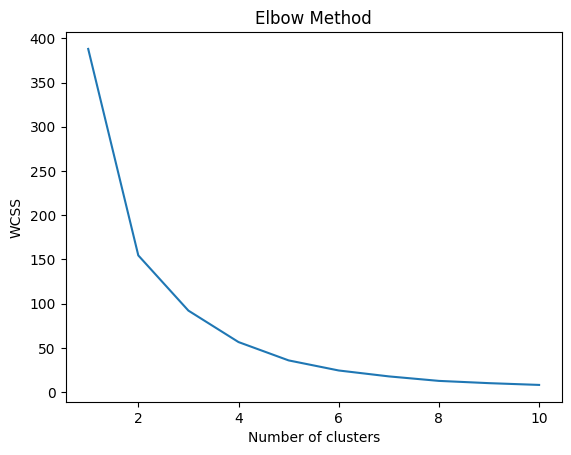

In [134]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

customer_overall_review_data = df['Customer Overall Review'].values.reshape(-1, 1)  # Reshape data for clustering

# Standardizing the data

scaler = StandardScaler()
customer_overall_review_data_scaled = scaler.fit_transform(customer_overall_review_data)

# Choosing the number of clusters (k) using Elbow method

# WCSS (Within-Cluster Sum of Squares) will help us decide the optimal k

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(customer_overall_review_data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method to find the optimal k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
# From the plot, we choose the optimal value of k

# Applying K-means clustering

# Choosing the optimal number of clusters based on the Elbow method (where on the plot above the 'elbow' occurs, which is around the point of 'number of clusters' being equal to 5)

k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(customer_overall_review_data_scaled)

# Adding cluster labels to the DataFrame

df['Customer Overall Review Cluster'] = cluster_labels

# Viewing the DataFrame with cluster labels

df.head()

,Age,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews,Sentiment,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Employee,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Medium (P1)_Direct call,Medium (P1)_Food delivery apps,Medium (P1)_Walk-in,Medium (P1)_Web browser,Medium (P2)_ Direct call,Medium (P2)_ Walk-in,Medium (P2)_ Web browser,Meal(P1)_Breakfast,Meal(P1)_Dinner,Meal(P1)_Lunch,Meal(P1)_Snacks,Meal(P2)_ Dinner,Meal(P2)_ Lunch,Meal(P2)_ Snacks,Perference(P1)_Bakery items (snacks),Perference(P1)_Non Veg foods (Lunch / Dinner),Perference(P1)_Sweets,Perference(P1)_Veg foods (Breakfast / Lunch / Dinner),Perference(P2)_ Bakery items (snacks),Perference(P2)_ Ice cream / Cool drinks,Perference(P2)_ Sweets,Perference(P2)_ Veg foods (Breakfast / Lunch / Dinner),Order Time_Anytime (Mon-Sun),Order Time_Weekdays (Mon-Fri),Order Time_Weekend (Sat & Sun),Customer Overall Review,Customer Overall Review Cluster
0,20,0.0,1.5,4,12.9766,77.5993,560001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Nil\n,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,2
1,24,0.5,1.0,3,12.9770,77.5773,560009,2.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.5,2.0,0.0,-1.0,-2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,Nil,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,140.0,3
2,22,0.5,1.5,3,12.9551,77.6593,560017,2.0,2.0,2.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,2.0,1.0,2.0,0.0,1.0,"Many a times payment gateways are an issue, so...",1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,77.0,1
3,22,0.0,1.0,6,12.9473,77.5616,560019,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,0.0,1.0,0.5,-1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,nil,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,60.0,1
4,22,0.5,1.5,4,12.9850,77.5533,560010,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,0.0,0.0,0.0,-1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,NIL,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,79.0,1


In [136]:
# Describing again the numerical columns of the dataset, which is necessary considering there were categorical columns turned into numerical that weren't featured in the same description of the kind. 

df.describe()

,Age,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Sentiment,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Employee,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Medium (P1)_Direct call,Medium (P1)_Food delivery apps,Medium (P1)_Walk-in,Medium (P1)_Web browser,Medium (P2)_ Direct call,Medium (P2)_ Walk-in,Medium (P2)_ Web browser,Meal(P1)_Breakfast,Meal(P1)_Dinner,Meal(P1)_Lunch,Meal(P1)_Snacks,Meal(P2)_ Dinner,Meal(P2)_ Lunch,Meal(P2)_ Snacks,Perference(P1)_Bakery items (snacks),Perference(P1)_Non Veg foods (Lunch / Dinner),Perference(P1)_Sweets,Perference(P1)_Veg foods (Breakfast / Lunch / Dinner),Perference(P2)_ Bakery items (snacks),Perference(P2)_ Ice cream / Cool drinks,Perference(P2)_ Sweets,Perference(P2)_ Veg foods (Breakfast / Lunch / Dinner),Order Time_Anytime (Mon-Sun),Order Time_Weekdays (Mon-Fri),Order Time_Weekend (Sat & Sun),Customer Overall Review,Customer Overall Review Cluster
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,0.734536,1.262887,3.280928,12.972058,77.600160,560040.113402,0.760309,0.744845,0.778351,0.590206,0.543814,0.494845,0.809278,0.087629,0.283505,0.219072,0.128866,-0.108247,-0.244845,-0.510309,0.378866,0.386598,0.474227,-0.082474,-0.072165,-0.384021,0.652062,0.815722,0.693299,0.840206,0.762887,0.314433,0.703608,0.600515,0.914948,1.025773,0.778351,0.997423,1.023196,1.025773,1.298969,1.283505,0.551546,0.198454,0.427835,0.572165,0.278351,0.030928,0.690722,0.304124,0.023196,0.139175,0.533505,0.012887,0.922680,0.056701,0.007732,0.536082,0.268041,0.195876,0.136598,0.234536,0.309278,0.319588,0.804124,0.072165,0.123711,0.002577,0.811856,0.007732,0.177835,0.033505,0.090206,0.118557,0.757732,0.693299,0.043814,0.262887,33.456186,1.298969
std,2.975593,0.795915,0.339804,1.351025,0.044489,0.051354,31.399609,0.976082,1.124934,1.084228,1.167876,1.190244,1.065054,1.092477,1.065092,1.168951,1.107152,1.167560,1.115377,1.217593,1.197498,1.058138,1.075941,1.020136,1.275247,1.311822,1.295770,0.689584,0.485112,0.823590,1.021845,0.975389,1.060982,1.010174,0.717230,0.627108,0.809731,0.870026,0.805340,0.842648,0.796864,0.749366,0.741558,0.835221,0.681462,0.495404,0.495404,0.448766,0.173346,0.462793,0.460629,0.150720,0.346576,0.499520,0.112931,0.267443,0.231569,0.087704,0.499340,0.443511,0.397386,0.343866,0.424256,0.462793,0.466919,0.397386,0.259095,0.329677,0.05

# 2. Exploratory Data Analysis

## <ins>2.a) Histogram display for the occurence-frequency of each numerical columns' values</ins>

I'm displaying a group of Histograms which show, for each now-numerical column, the frequency of customer-orders per each value on those very columns.

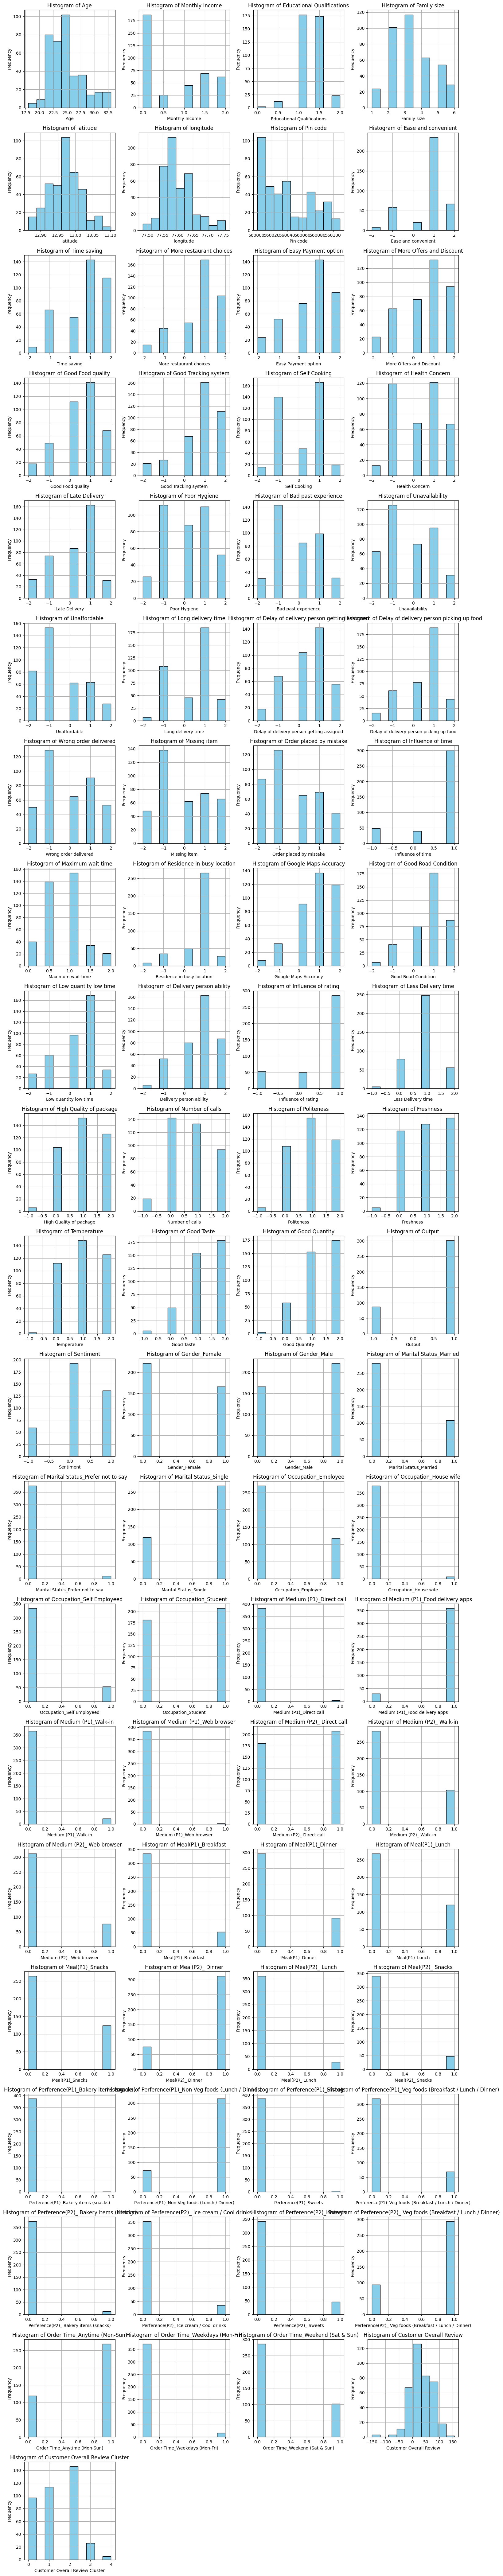

In [137]:
import math

num_cols = 4
num_numerical_cols = df.select_dtypes(include='number').shape[1]
num_rows = math.ceil(num_numerical_cols / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df.select_dtypes(include='number')):
    ax = axes[i]
    ax.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## <ins>2.b) Boxplot display for the dispersion of each numerical columns' values</ins>

We're displaying a group of boxplots, each for every numerical column in our dataset and each showing dispersion-related metrics:

- the inter-quartile range (which identifies the 25th and 75th percentiles)
- the median
- the distribution's outliers

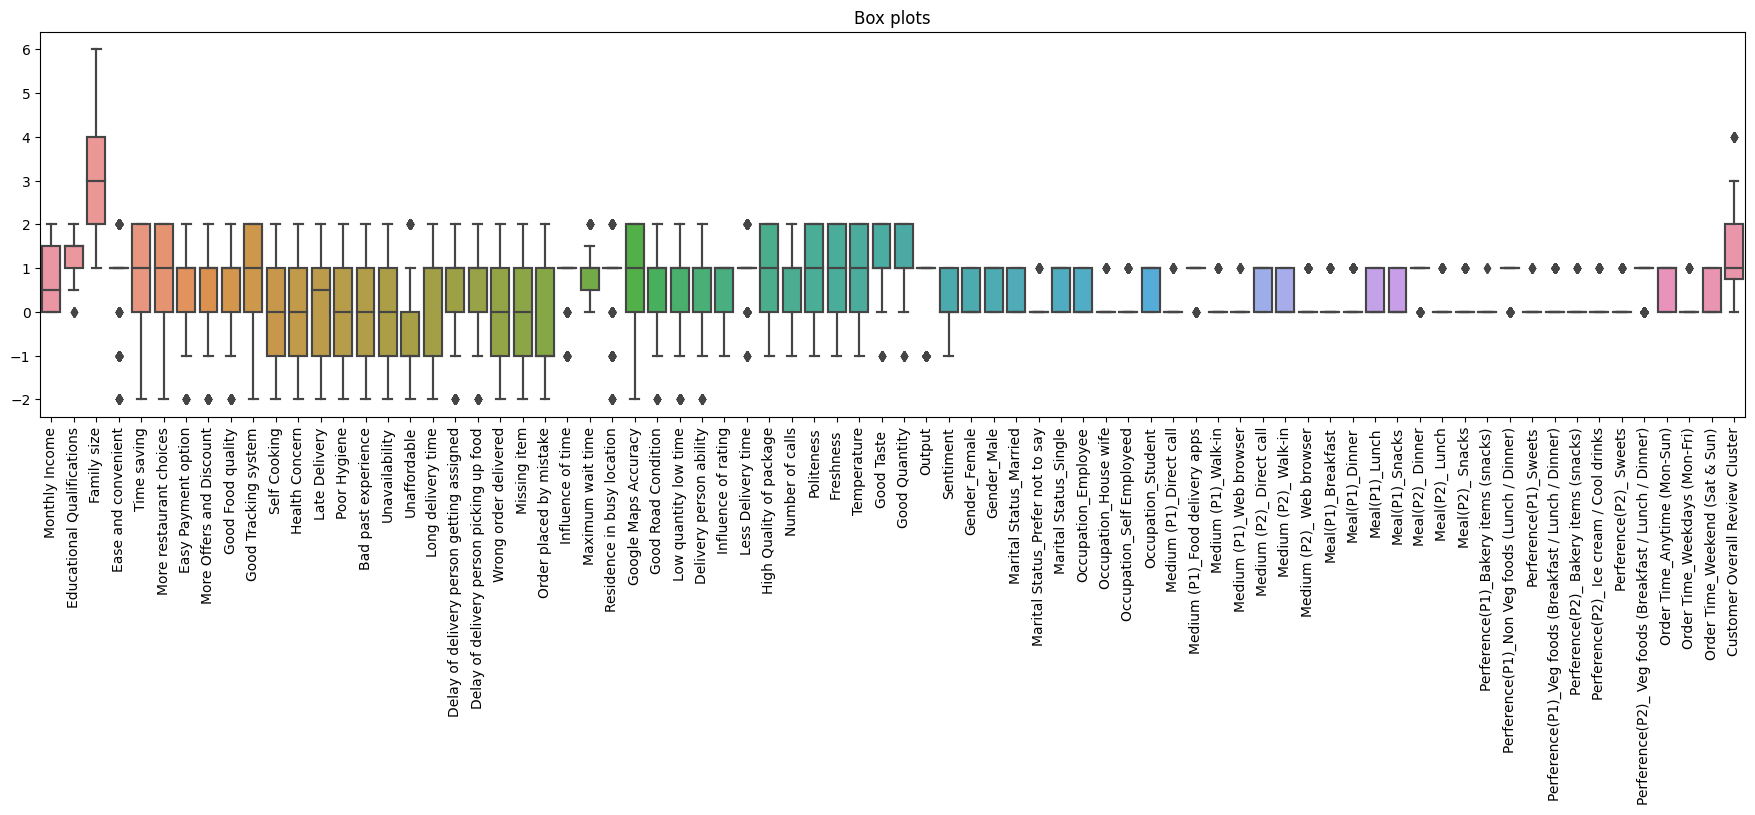

In [138]:
import seaborn as sns

plt.figure(figsize=(22,5))

ax = sns.boxplot(data=df.select_dtypes(include='number').drop(columns=['Age', 'latitude', 'longitude', 'Pin code', 'Customer Overall Review']))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.boxplot(data=df.select_dtypes(include='number').drop(columns=['Age', 'latitude', 'longitude', 'Pin code', 'Customer Overall Review']))

plt.title('Box plots')

plt.show()

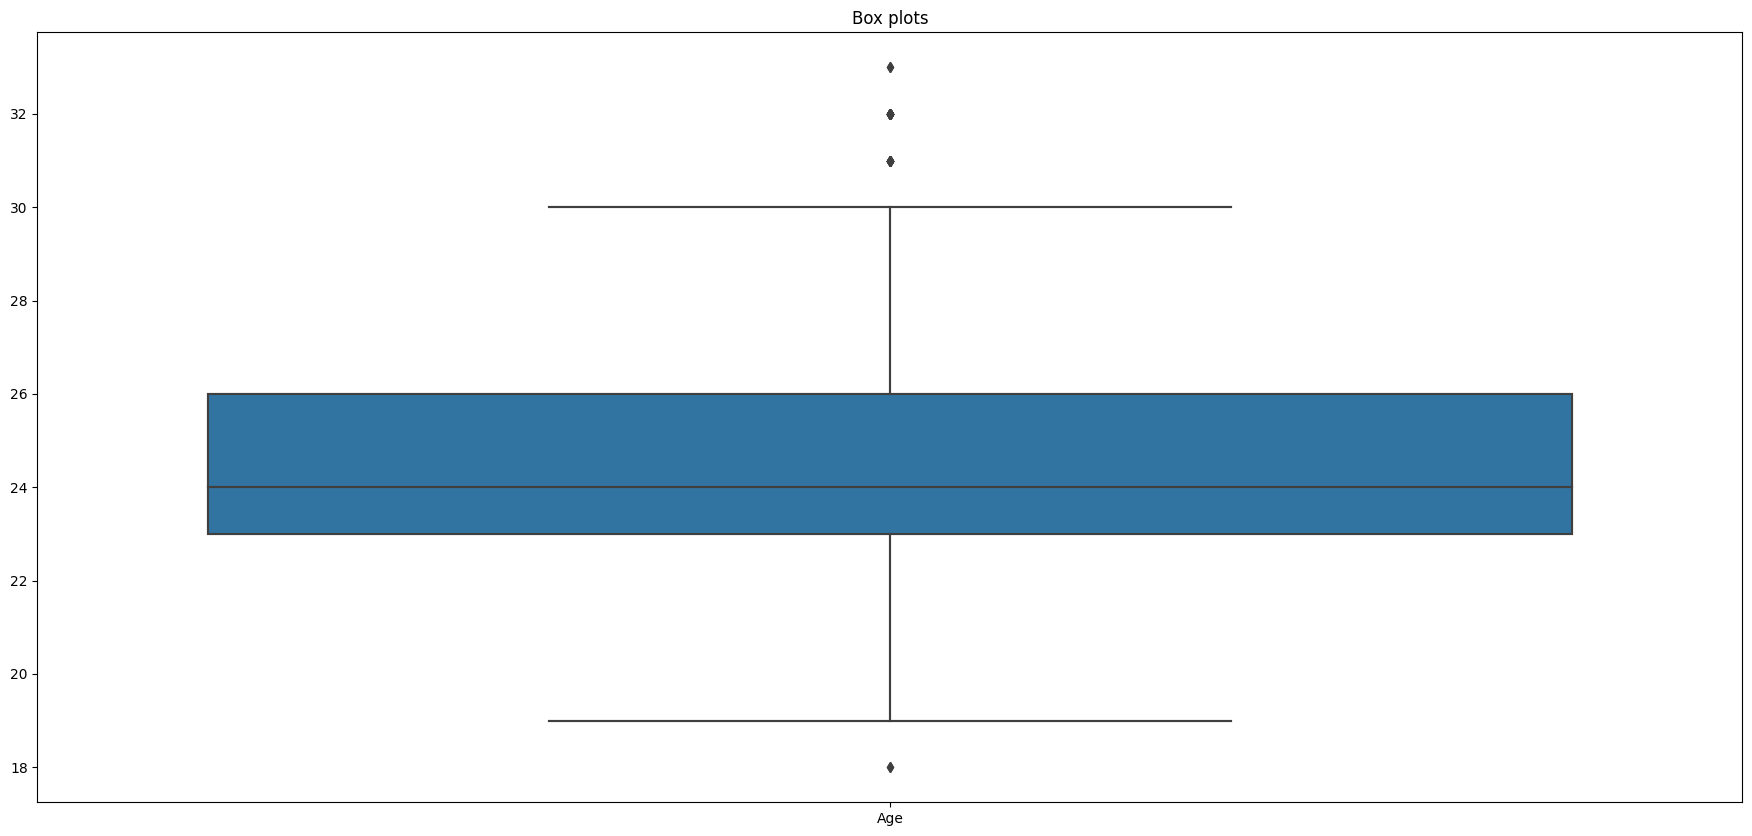

In [139]:
numerical_columns_subgroup_a = ['Age']

plt.figure(figsize=(22,10))

ax = sns.boxplot(data=df[numerical_columns_subgroup_a])
ax.set_xticklabels(ax.get_xticklabels())

sns.boxplot(data=df[numerical_columns_subgroup_a])

plt.title('Box plots')

plt.show()

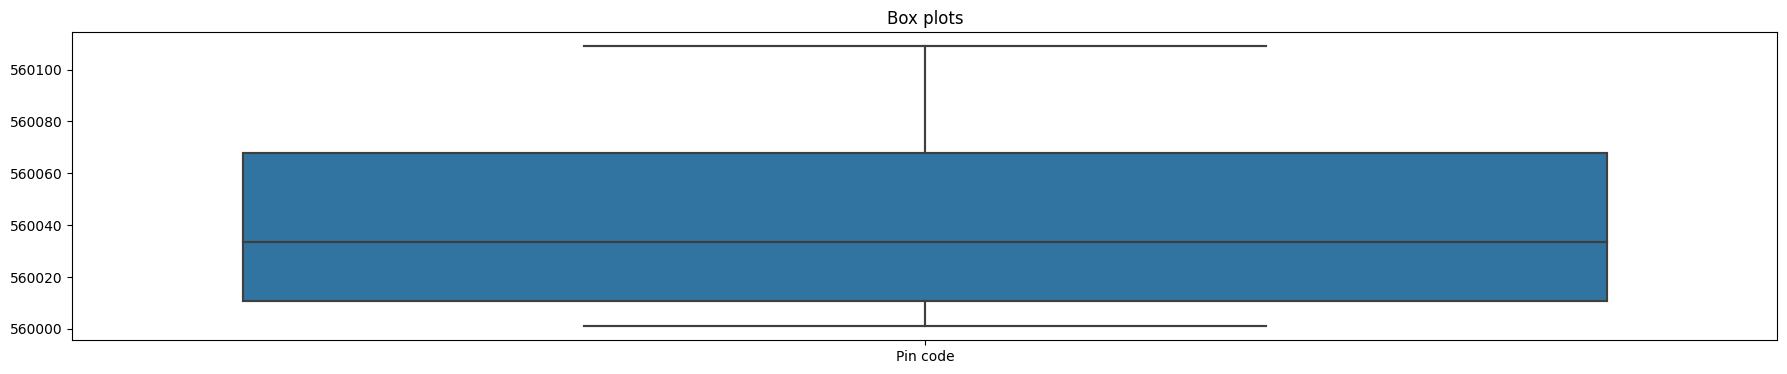

In [140]:
numerical_columns_subgroup_b = ['Pin code']

plt.figure(figsize=(22,4))

ax = sns.boxplot(data=df[numerical_columns_subgroup_b])
ax.set_xticklabels(ax.get_xticklabels())

sns.boxplot(data=df[numerical_columns_subgroup_b])

plt.title('Box plots')

plt.show()

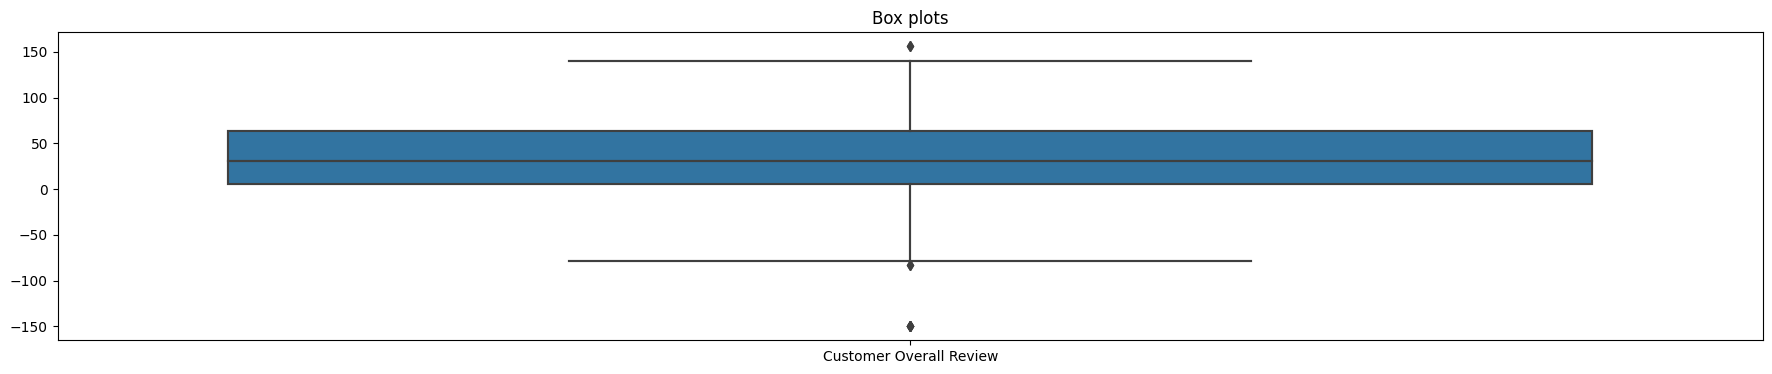

In [141]:
numerical_columns_subgroup_c = ['Customer Overall Review']

plt.figure(figsize=(22,4))

ax = sns.boxplot(data=df[numerical_columns_subgroup_c])
ax.set_xticklabels(ax.get_xticklabels())

sns.boxplot(data=df[numerical_columns_subgroup_c])

plt.title('Box plots')

plt.show()

## <ins>2.c) Relation between selected independent and dependent variables of the dataset</ins>

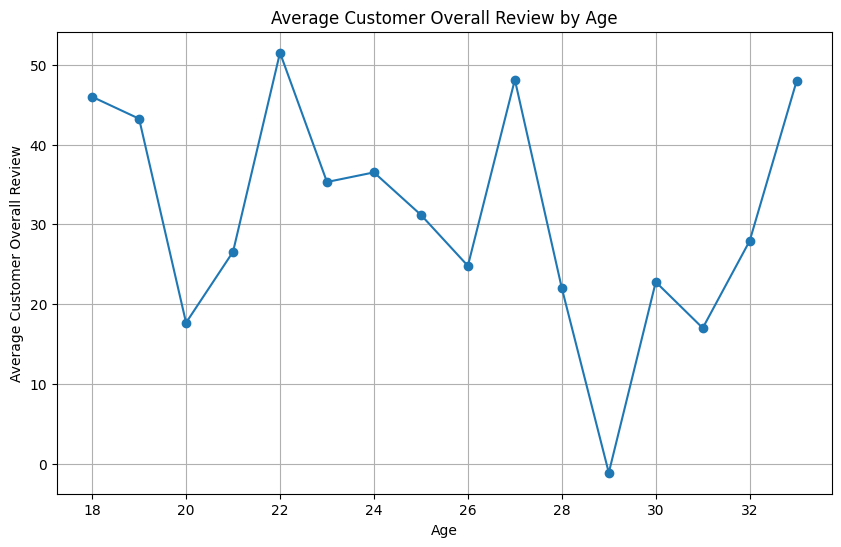

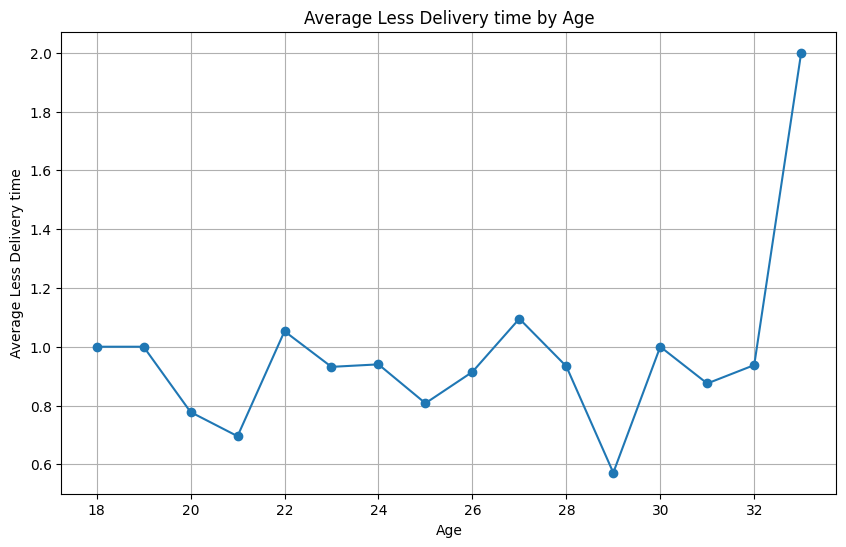

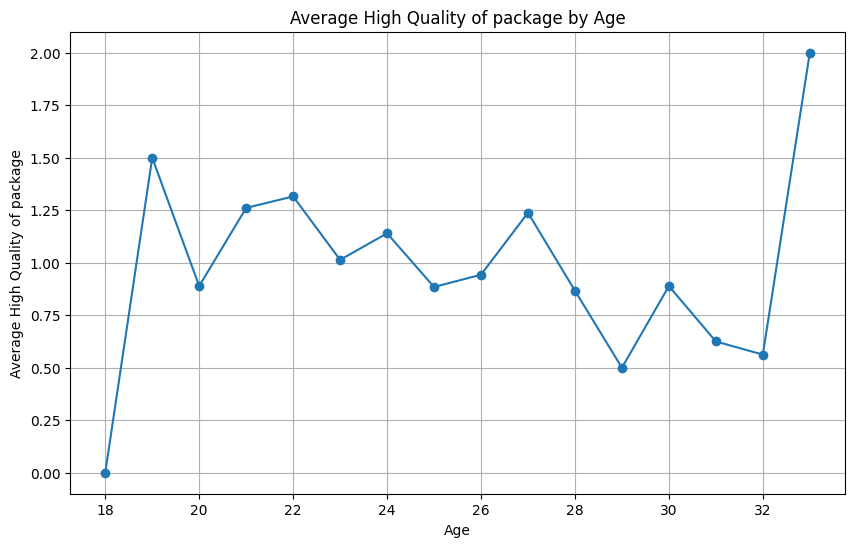

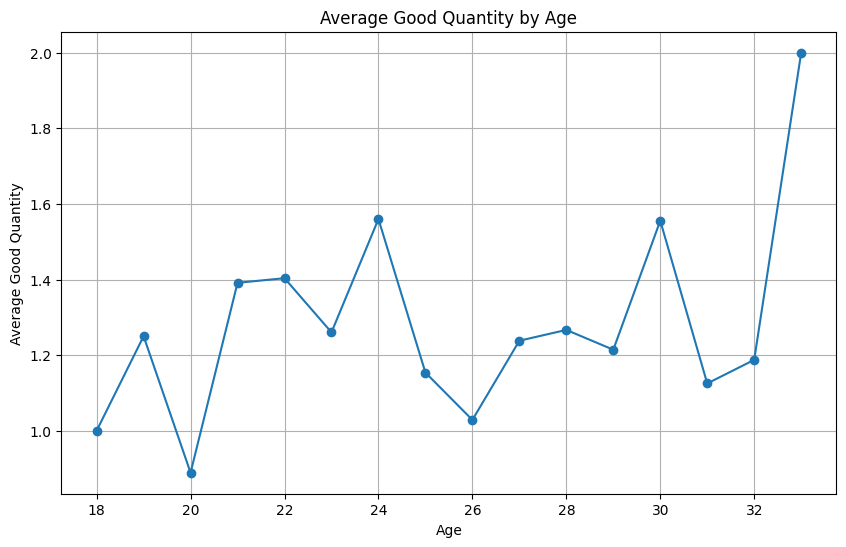

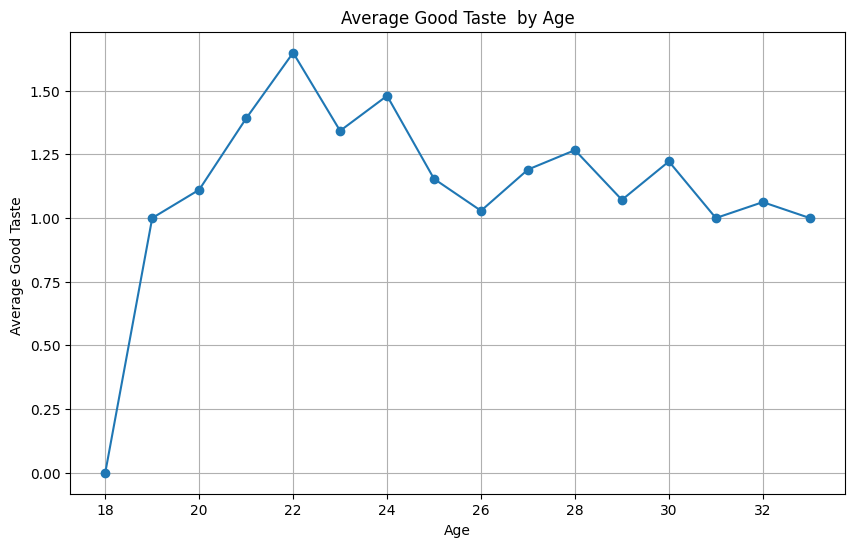

In [26]:
def plot_metric_by_age(df, metric):
    # Calculate the average of the metric by Age
    avg_metric_by_age = df.groupby('Age')[metric].mean().reset_index()

    # Plotting using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(avg_metric_by_age['Age'], avg_metric_by_age[metric], marker='o')
    plt.xlabel('Age')
    plt.ylabel(f'Average {metric}')
    plt.title(f'Average {metric} by Age')
    plt.grid(True)
    plt.show()

metrics = [
    'Customer Overall Review',
    'Less Delivery time',
    'High Quality of package',
    'Good Quantity',
    'Good Taste '
]

# Plot each metric by Age
for metric in metrics:
    plot_metric_by_age(df, metric)

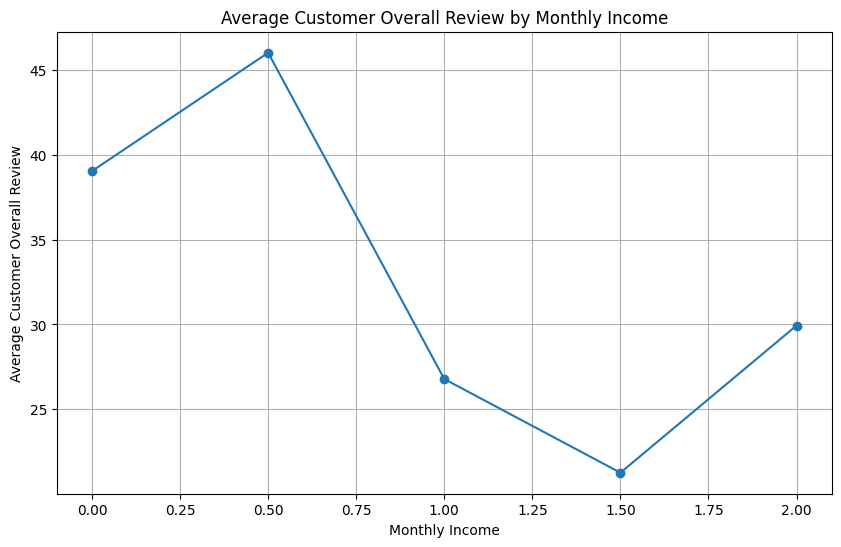

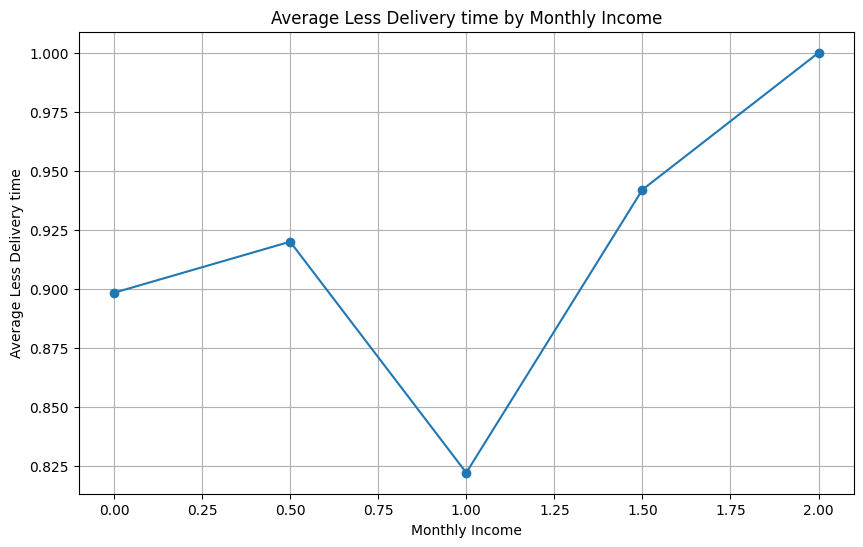

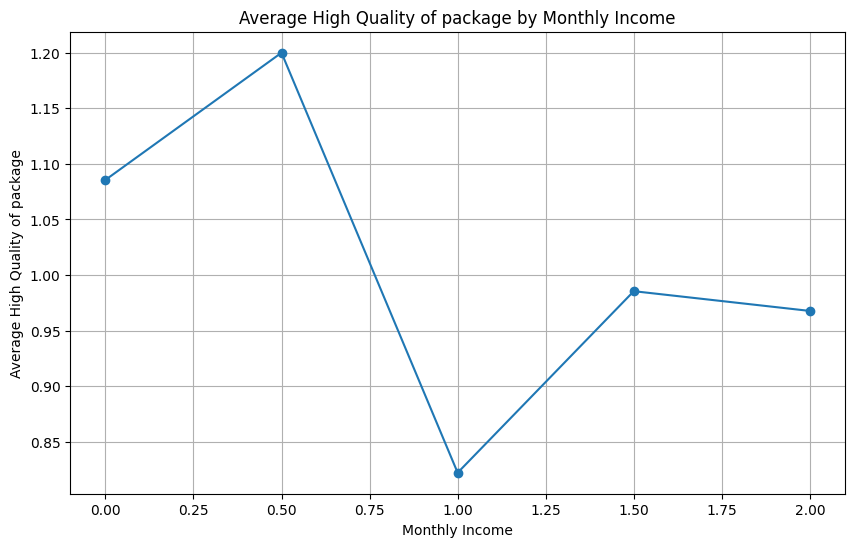

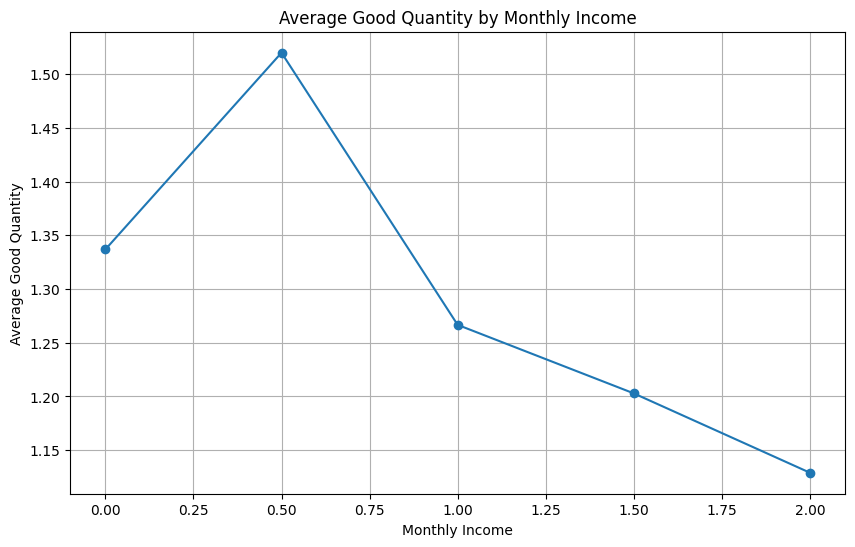

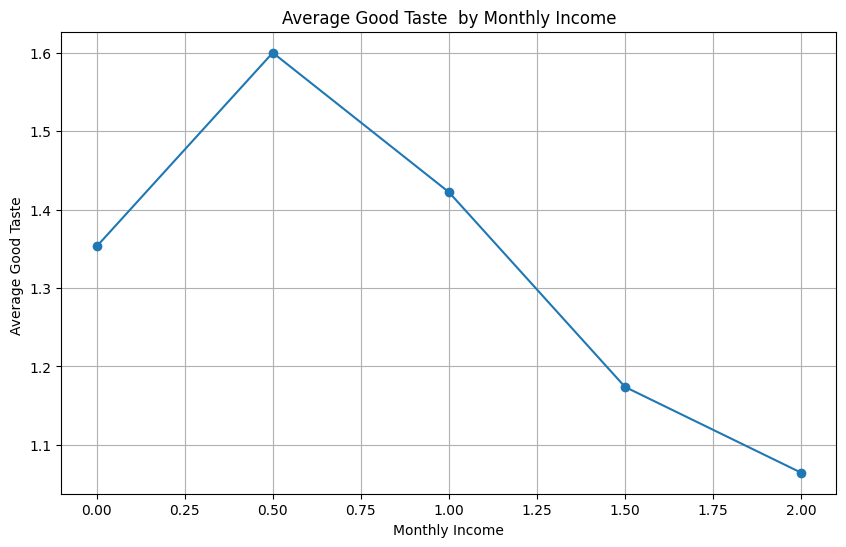

In [27]:
def plot_metric_by_monthly_income(df, metric):
    # Calculate the average of the metric by Monthly Income
    avg_metric_by_monthly_income = df.groupby('Monthly Income')[metric].mean().reset_index()

    # Plotting using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(avg_metric_by_monthly_income['Monthly Income'], avg_metric_by_monthly_income[metric], marker='o')
    plt.xlabel('Monthly Income')
    plt.ylabel(f'Average {metric}')
    plt.title(f'Average {metric} by Monthly Income')
    plt.grid(True)
    plt.show()

metrics = [
    'Customer Overall Review',
    'Less Delivery time',
    'High Quality of package',
    'Good Quantity',
    'Good Taste '
]

# Plot each metric by Monthly Income
for metric in metrics:
    plot_metric_by_monthly_income(df, metric)

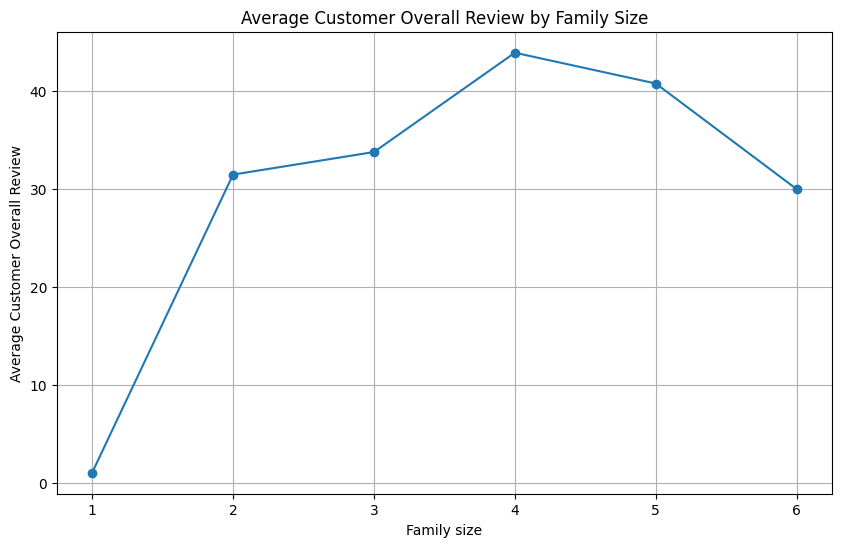

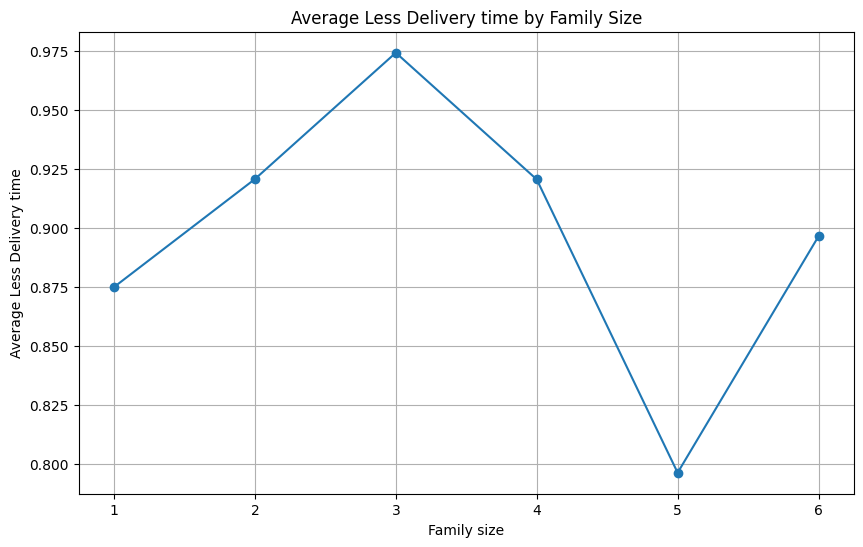

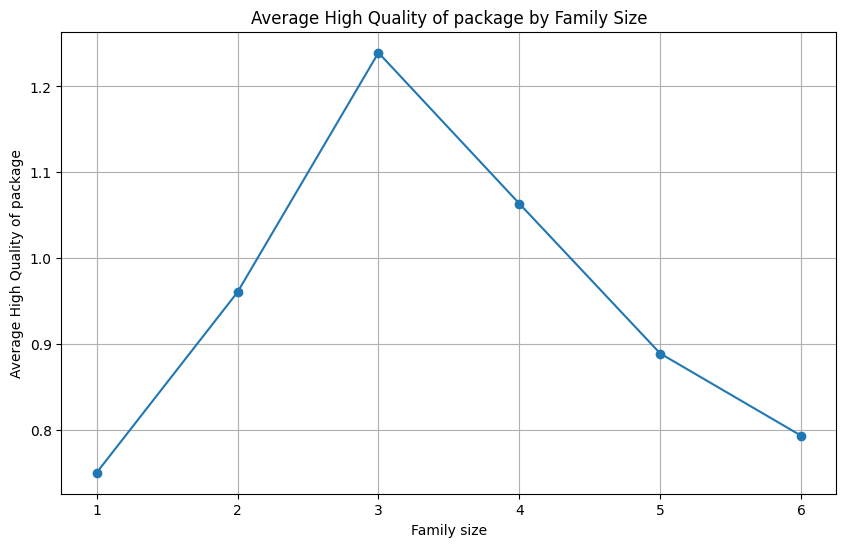

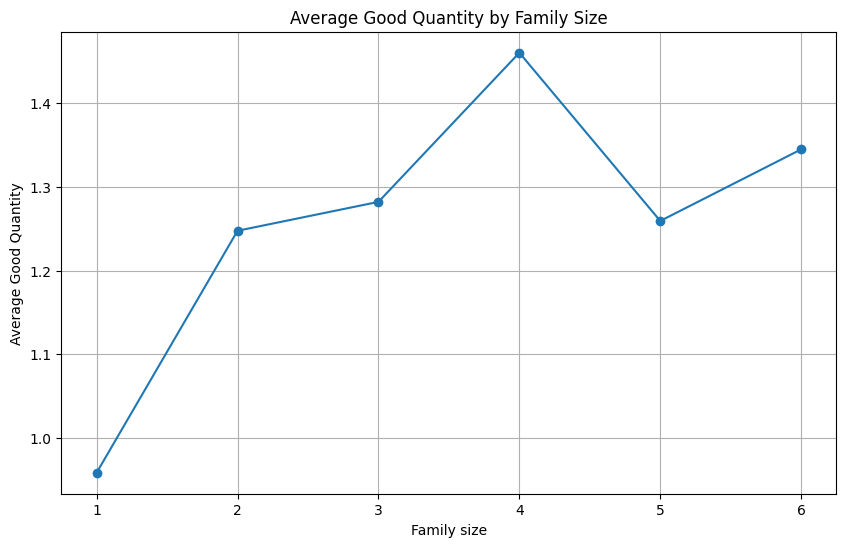

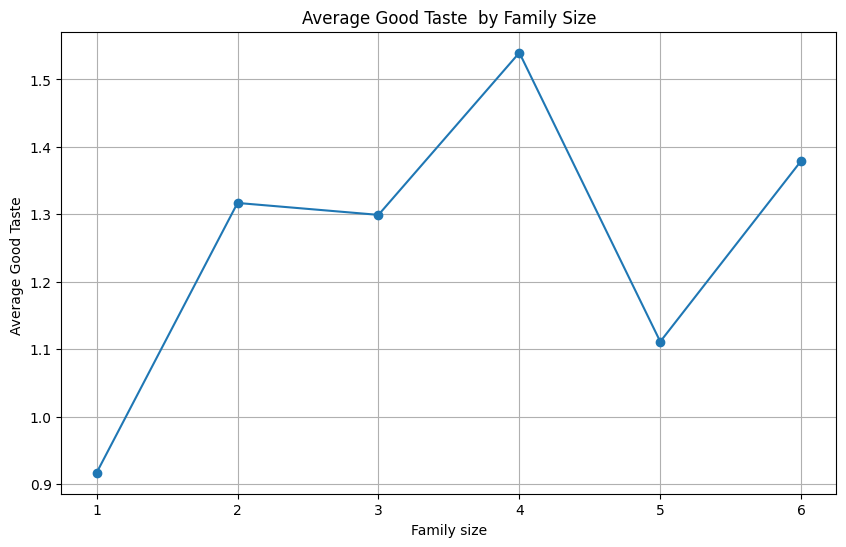

In [28]:
def plot_metric_by_family_size(df, metric):
    # Calculate the average of the metric by Family Size
    avg_metric_by_family_size = df.groupby('Family size')[metric].mean().reset_index()

    # Plotting using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(avg_metric_by_family_size['Family size'], avg_metric_by_family_size[metric], marker='o')
    plt.xlabel('Family size')
    plt.ylabel(f'Average {metric}')
    plt.title(f'Average {metric} by Family Size')
    plt.grid(True)
    plt.show()

metrics = [
    'Customer Overall Review',
    'Less Delivery time',
    'High Quality of package',
    'Good Quantity',
    'Good Taste '
]

# Plot each metric by Family Size
for metric in metrics:
    plot_metric_by_family_size(df, metric)

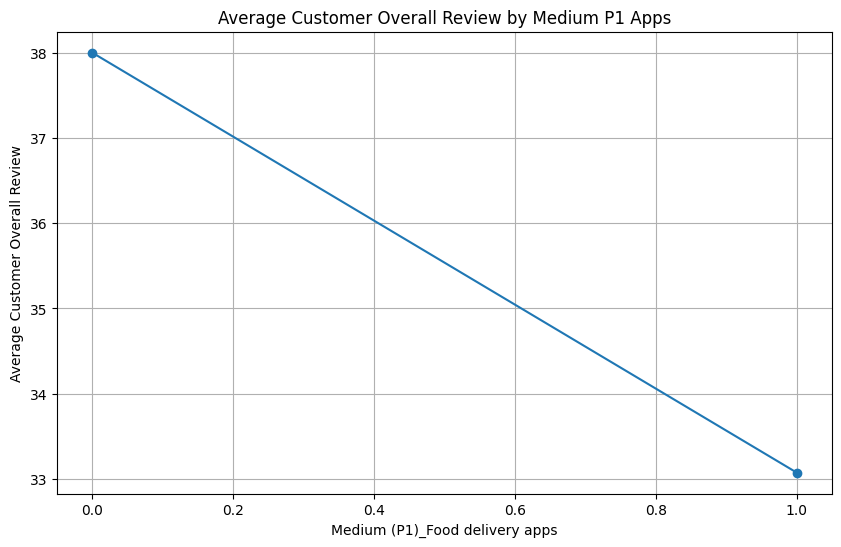

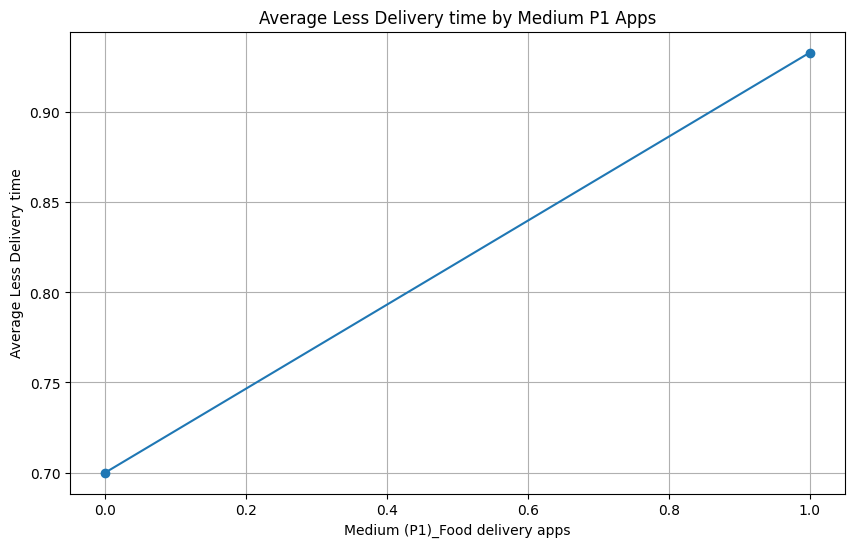

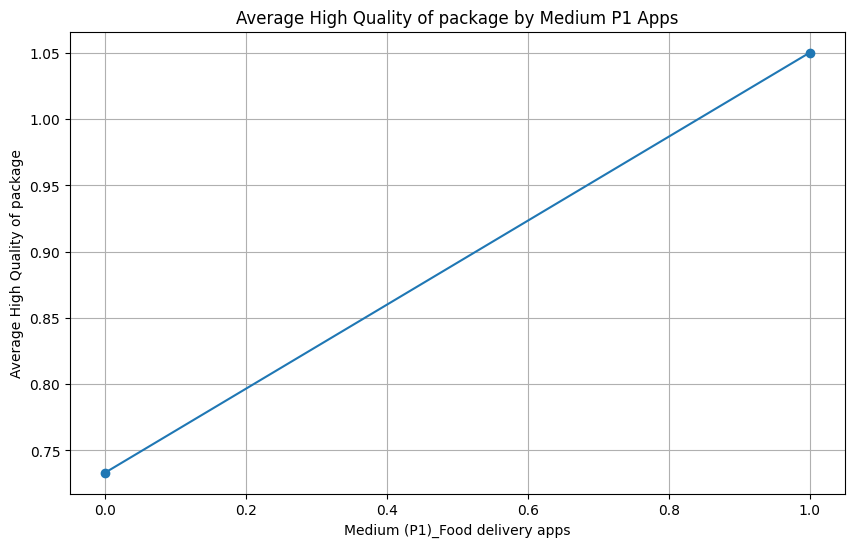

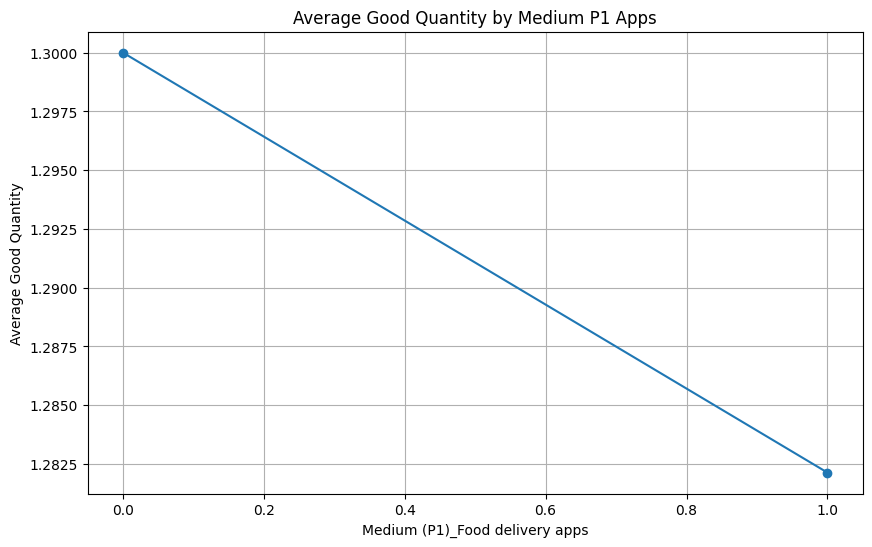

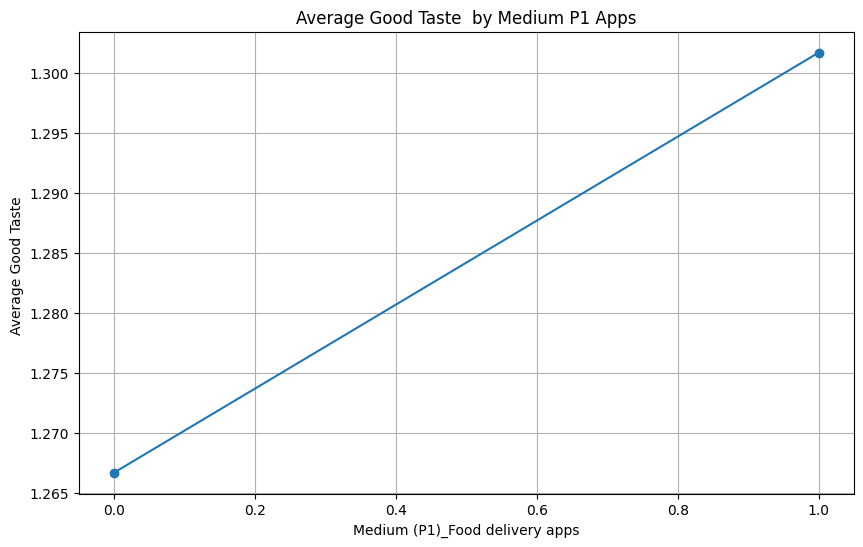

In [29]:
def plot_metric_by_medium_p1_apps(df, metric):
    # Calculate the average of the metric by Medium P1 Apps
    avg_metric_by_medium_p1_apps = df.groupby('Medium (P1)_Food delivery apps')[metric].mean().reset_index()

    # Plotting using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(avg_metric_by_medium_p1_apps['Medium (P1)_Food delivery apps'], avg_metric_by_medium_p1_apps[metric], marker='o')
    plt.xlabel('Medium (P1)_Food delivery apps')
    plt.ylabel(f'Average {metric}')
    plt.title(f'Average {metric} by Medium P1 Apps')
    plt.grid(True)
    plt.show()

metrics = [
    'Customer Overall Review',
    'Less Delivery time',
    'High Quality of package',
    'Good Quantity',
    'Good Taste '
]

# Plot each metric by Medium P1 Apps
for metric in metrics:
    plot_metric_by_medium_p1_apps(df, metric)

## Insights from 2.a) Histogram display for the occurence-frequency of each numerical columns' values, 2.b) Boxplot display for the dispersion of each numerical columns' values and 2.c) Relation between selected independent and dependent variables of the dataset

The dataset at hands can be divided into 4 sub-groups:

- 1 --> Customer's Personal Characteristics: this includes (a) the columns "Age" through "Pin code", (b) the columns "Gender_female" through "Occupation_student" (starting from the left and going to the right of the dataset), (c) column "Good Road Condition" and (d) "Residence in busy location".
  
- 2 --> Customer's Opinion of Service: this includes (a) the columns "Ease & Convenient" through "Order placed by mistake", (b) column "Maximum wait time", (c) column "Google Maps Accuracy", (d) "Low quantity low time" through "Delivery Person ability", (e) columns "Reviews" through "Sentiment" (f) column "Output" and (g) the columns "Customer Overall Review" through "Customer Overall Review Cluster" (all groups starting from the left and going to the right of the dataset). We recap that the columns in (g), for each order, are an average of a customer's opinion on the service hence serve as our north-star to judge service quality as perceived by clients. 
  
- 3 --> Customer's Order's Characteristics: this includes the columns "Medium (P1)_Direct call" through "Order Time_Weekend (Sat & Sun)" (starting from the left and going to the right of the dataset).
  
- 4 --> Customer's Preferences of Service: this includes (a) column "Influence of Time" and (b) columns "Influence of Rating" through "Good Quantity" (starting from the left and going to the right of the dataset).

For purposes of presenting the insights concerning 2.a) and 2.b), we've used the partition explained just above to study the relationship between the sub-groups containing independent variables (those would be 1. and 3.) and those containing dependent variables (2. and 4.). Such a study identifies which clusters of independent variables the companies whose orders are featured on the dataset can foster to improve their quality metrics. 

To complete that very study, we haven't selected each and every variable amongst each of those 4 groups, we rather selected a few ones whose correlation would, we intuitively think, result in actionable insights. The study follows: 

- **Age:** the 25th, 50th and 75th percentiles are 23 y.o., 24 y.o. and 26 y.o., respectively; the mean is 24,63 y.o; the column's outliers are spread throughout a rather small number of ages: 18 y.o., 31 y.o., 32 y.o. and 33 y.o; the distribution's left-skewed.

- <ins>Opportunity to improve the afore-cited metric:</ins>

    - Age & Customer Overall Review --> Ages between 20 and 21 (all-inclusive), Age 26 and Ages between 28 and 32 (all-inclusive) all have a per-age average Customer Overall Reviews rating that's under 30 (unlike any and all of the unmentioned Ages)
 
    - Age & Less Delivery Time --> Of all the Ages with a Customer Overall Reviews rating under 30, only Age 31 sees, on average, Less Delivery Time as "Important" or "Very Important", meaning shrinking the delivery time isn't a good strategy to improve Customer Overall Review in the worse-performing Ages.
 
    - Age & High Quality of Package --> Of all the Ages with a Customer Overall Reviews rating under 30, only Age 21 sees, on average, High Quality of Package as "Important" or "Very Important", meaning bettering the package isn't a good strategy to improve Customer Overall Review in the worse-performing Ages.
 
    - Age & Good Quantity --> Of all the Ages with a Customer Overall Reviews rating under 30, all Ages but Age 20 see, on average, Good Quantity (of food/drinks delivered) as "Important" or "Very Important", meaning bettering the quantity delivered is a good strategy to improve Customer Overall Review in the worse-performing Ages.
 
    - Age & Good Taste --> Of all the Ages with a Customer Overall Reviews rating under 30, precisely all of those Ages see, on average, Good Taste (of food/drinks delivered) as "Important" or "Very Important", meaning bettering the taste of the food/drinks delivered is a good strategy to improve Customer Overall Review in the worse-performing Ages.

- **Monthly Income:** the 25th, 50th and 75th percentiles are "No Income", "Below Rs. 10,000" and "25,001 to 50,000", respectively; the mean is 0,73 (meaning between "Below Rs. 10,000" and "10,001 to 25,000"); there are no outliers; the distribution's left-skewed.

- <ins>Opportunity to improve the afore-cited metric:</ins>

    - Monthly Income & Customer Overall Review --> Incomes above Rs. 10,000 all have a per-cluster-of-income Customer Overall Reviews rating that's under 30 (unlike any and all of the unmentioned Monthly Income clusters) 
 
    - Monthly Income & Less Delivery Time --> Of all the clusters of monthly income with a Customer Overall Reviews rating under 30, only the cluster "More than 50,000" (which comprises around 1/3 of all orders in the aforecited under-performing sub-group) sees, on average, Less Delivery Time as "Important" or "Very Important", meaning shrinking the delivery time isn't a good strategy to improve Customer Overall Review in the worse-performing monthly income clusters. 
 
    - Monthly Income & High Quality of Package --> Of all the clusters of monthly income with a Customer Overall Reviews rating under 30, no cluster sees, on average, High Quality of Package as "Important" or "Very Important", meaning bettering the package isn't a good strategy to improve Customer Overall Review in the worse-performing monthly income clusters.
 
    - Monthly Income & Good Quantity --> Of all the clusters of monthly income with a Customer Overall Reviews rating under 30, all clusters see, on average, Good Quantity (of food/drinks delivered) as "Important" or "Very Important", meaning bettering the quantity delivered is a good strategy to improve Customer Overall Review in the worse-performing monthly income clusters.
 
    - Monthly Income & Good Taste --> Of all the clusters of monthly income with a Customer Overall Reviews rating under 30, all clusters see, on average, Good Taste (of food/drinks delivered) as "Important" or "Very Important", meaning bettering the taste of the food/drinks delivered is a good strategy to improve Customer Overall Review in the worse-performing monthly income clusters.

- **Family Size:** the 25th, 50th and 75th percentiles are 2, 3 and 4, respectively; the mean is 3,28; there are no outliers; the distribution's left-skewed.

- <ins>Opportunity to improve the afore-cited metric:</ins>

    - Family Size & Customer Overall Review --> Family size of 1 (person) has a per-size Customer Overall Reviews rating that's under 30 (unlike any and all of the unmentioned Family Sizes)
 
    - Family Size & Less Delivery Time --> The Family size cluster with a Customer Overall Reviews rating under 30 doesn't see, on average, Less Delivery Time as "Important" or "Very Important", meaning shrinking the delivery time isn't a good strategy to improve Customer Overall Review in the worse-performing family size cluster. 
 
    - Family Size & High Quality of Package --> The Family size cluster with a Customer Overall Reviews rating under 30 doesn't see, on average, High Quality of Package as "Important" or "Very Important", meaning bettering the package isn't a good strategy to improve Customer Overall Review in the worse-performing family size cluster.
 
    - Family Size & Good Quantity --> The Family size cluster with a Customer Overall Reviews rating under 30 doesn't see, on average, Good Quantity (of food/drinks delivered) as "Important" or "Very Important", meaning bettering the quantity delivered is a good strategy to improve Customer Overall Review in the worse-performing family size cluster. 
 
    - Family Size & Good Taste --> The Family size cluster with a Customer Overall Reviews rating under 30 doesn't see, on average, Good Taste (of food/drinks delivered) as "Important" or "Very Important", meaning bettering the taste of the food/drinks delivered is a good strategy to improve Customer Overall Review in the worse-performing family size cluster.
 
- **Medium(P1) Food delivery apps:** the 25th, 50th and 75th percentiles are all 1; the mean is 0,92; there are no outliers; the distribution's right-skewed.

- - <ins>Opportunity to improve the afore-cited metric:</ins>

    - Medium(P1) Food delivery apps & Customer Overall Review --> Customers who've indicated Food delivery apps as their most-preferred medium of consumption have, on average, a Customer Overall Reviews rating that's under 34 (unlike the average of customers who haven't indicated delivery apps as their most-preferred medium of consumption)
 
    - Medium(P1) Food delivery apps & Less Delivery Time --> Customers who've indicated Food delivery apps as their most-preferred medium of consumption don't see, on average, Less Delivery Time as "Important" or "Very Important", meaning shrinking the delivery time isn't a good strategy to improve Customer Overall Review in the worst-performing most-preferred medium of consumption)
 
    - Medium(P1) Food delivery apps & High Quality of Package --> Customers who've indicated Food delivery apps as their most-preferred medium of consumption see, on average, High Quality of Package as "Important" or "Very Important", meaning bettering the package-quality is a good strategy to improve Customer Overall Review in the worst-performing most-preferred medium of consumption)
 
    - Medium(P1) Food delivery apps & Good Quantity --> Customers who've indicated Food delivery apps as their most-preferred medium of consumption see, on average, Good Quantity (of food/drinks delivered) as "Important" or "Very Important", meaning bettering the quantity delivered is a good strategy to improve Customer Overall Review in the worst-performing most-preferred medium of consumption)
 
    - Medium(P1) Food delivery apps & Good Taste --> Customers who've indicated Food delivery apps as their most-preferred medium of consumption see, on average, Good Taste (of food/drinks delivered) as "Important" or "Very Important", meaning bettering the taste of the food delivered is a good strategy to improve Customer Overall Review in the worst-performing most-preferred medium of consumption)
 
- **Conclusion:** To improve the Customer Overall Review ratings across the worst-performing Ages, Monthly Income Clusters, Family Sizes & consumers who claim the app's their most-preferred means of ordering the food/drinks, there are 2 (and no more than 2) metrics out of the 5 dependent variables we've studied above that are seen by those worst-performing clients as either "Important" or "Very Important", meaning they should be the ones to be fostered: "Good Quantity" & "Good Taste".

## <ins>2.d) Pivot table indicating the Top 20 orders with the greatest Customer Overall Review</ins>

In [142]:
top_20_df = df.nlargest(20, 'Customer Overall Review')

selected_columns = [
    'Age', 'Monthly Income', 'Family size',
    'Medium (P1)_Food delivery apps', 'Less Delivery time',
    'High Quality of package', 'Good Quantity',
    'Good Taste ', 'Customer Overall Review'
]
top_20_df = top_20_df[selected_columns]

print(top_20_df)

     Age  Monthly Income  Family size  Medium (P1)_Food delivery apps  \
93    24             0.0            3                             1.0   
1     24             0.5            3                             1.0   
55    28             0.0            2                             1.0   
10    22             0.0            5                             1.0   
308   22             0.0            5                             1.0   
385   22             0.0            5                             1.0   
41    23             0.0            3                             1.0   
107   25             0.0            1                             1.0   
111   25             0.0            1                             1.0   
11    23             0.5            2                             1.0   
309   23             0.5            2                             1.0   
386   23             0.5            2                             1.0   
45    27             1.0            2              

## Insights from 2.d) Pivot table indicating the Top 20 orders with the greatest Customer Overall Review

- 85% of the top-20 highest-rated orders by "Customer Overall Review" come from Ages which, on whole-dataset-average, have such rating being 30 or over, meaning the dataset-wide tendencies on this matter can also be verified at the very top of the orders' rating-list.

- 90% of the top-20 highest-rated orders by "Customer Overall Review" come from either customers with no income or an income below Rs. 10,000, meaning that, for that rather small 20 order sample, the lowest-earning customers seem to enjoy the service more than the remaining. This seems to follow a trend similar to that of the dataset as a whole, whose bigger-income-clusters correlate with lower customer review ratings (in comparison with lower-income-clusters).

- 90% of the top-20 highest-rated orders by "Customer Overall Review" come from Family sizes over 1 (measured in number of people) and those are precisely the sizes which, on whole-dataset-average, have such rating being 30 or over, meaning the dataset-wide tendencies on this matter can also be verified at the very top of the orders' rating-list.

- 100% of the top-20 highest-rated orders by "Customer Overall Review" come from customers who've indicated their most-preferred medium of ordering as the app, and that's precisely the sub-group that's ranked the highest, on whole-dataset-average, for the aforecited rating, meaning the dataset-wide tendencies on this matter can also be verified at the very top of the orders' rating-list.

- 90% of the customers responsible for the top-20 highest-rated orders by "Customer Overall Review" identify both "Good Quantity" and "Good Taste" as either Important or Very Important. This again corroborates the conclusion displayed on Insights from 2.a), 2.b) and 2.c) that customers place great value in those 2 metrics, which gives more strength to the suggestion that improving those very metrics can greatly improve customer rating in under-performing data-clusters.

# 3. Data Preprocessing for Machine Learning

## <ins>3.a) Outlier Elimination</ins>

Generally, in prediction exercises, it's good practice to either remove or cap the outliers that make up the prediction model's input framework before proceeding to actual prediction, as outliers may skew projections.

The choice to either completely remove or merely cap outlying values depends on the outliers being legitimate datapoints or instead data errors. In the case of our dataframe, the outliers do represent actual bookings and so should be taken into account in any predictions, so I will choose to cap them.

In [143]:
df_X = df[['Age', 'Monthly Income', 'Educational Qualifications', 'Family size', 'latitude', 
        'longitude', 'Pin code', 'Gender_Female', 'Gender_Male', 'Marital Status_Married', 
        'Marital Status_Prefer not to say', 'Marital Status_Single', 'Occupation_Employee', 
        'Occupation_House wife', 'Occupation_Self Employeed', 'Occupation_Student', 
        'Good Road Condition', 'Residence in busy location', 
        'Medium (P1)_Direct call', 'Medium (P1)_Food delivery apps', 'Medium (P1)_Walk-in', 
        'Medium (P1)_Web browser', 'Medium (P2)_ Direct call', 'Medium (P2)_ Walk-in', 
        'Medium (P2)_ Web browser', 'Meal(P1)_Breakfast', 'Meal(P1)_Dinner', 'Meal(P1)_Lunch', 
        'Meal(P1)_Snacks', 'Meal(P2)_ Dinner', 'Meal(P2)_ Lunch', 'Meal(P2)_ Snacks', 
        'Order Time_Anytime (Mon-Sun)', 'Order Time_Weekdays (Mon-Fri)', 'Order Time_Weekend (Sat & Sun)']]

df_Y = df[['Ease and convenient', 'Time saving', 'More restaurant choices', 'Easy Payment option', 
        'More Offers and Discount', 'Good Food quality', 'Good Tracking system', 'Self Cooking', 
        'Health Concern', 'Late Delivery', 'Poor Hygiene', 'Bad past experience', 'Unavailability', 
        'Unaffordable', 'Long delivery time', 'Delay of delivery person getting assigned', 
        'Delay of delivery person picking up food', 'Wrong order delivered', 'Missing item', 
        'Order placed by mistake', 'Maximum wait time', 'Google Maps Accuracy', 'Low quantity low time', 
        'Delivery person ability', 'Sentiment', 'Output', 'Customer Overall Review', 
        'Customer Overall Review Cluster', 'Influence of time', 'Influence of rating', 
        'Less Delivery time', 'High Quality of package', 'Number of calls', 'Politeness', 'Freshness ', 
        'Temperature', 'Good Taste ', 'Good Quantity']]

# Calculating the IQR for each column
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the data points beyond the bounds
capped_data = df_X.clip(lower=lower_bound, upper=upper_bound, axis=1)

## <ins>3.b) Distribution fitting via Standardization and Dimensionality Reduction via Factor analysis</ins>

The following Factor Analysis will identify underlying factors or latent variables in the dataset which explain patterns of correlations amongst the dataset's variables. Its goal is to reduce the amount of dataset's columns we'll use in forthcoming analytical exercises, namely product experimentation and machine learning, which reduces the possiblity of data-overfitting, computational complexity and visualization difficulties. 

We'll carry out specific Factor Analysis for each of those 2 groups (to then accommodation for the forthcoming MANOVA):

1) Independent variables:

    - Customer's Personal Characteristics:
  
        Age
        Monthly Income
        Educational Qualifications
        Family size
        latitude
        longitude
        Pin code
        Gender_Female
        Gender_Male
        Marital Status_Married
        Marital Status_Prefer not to say
        Marital Status_Single
        Occupation_Employee
        Occupation_House wife
        Occupation_Self Employeed
        Occupation_Student
        Good Road Condition
        Residence in busy location
  
    - Customer's Order's Characteristics: 

        Medium (P1)_Direct call
        Medium (P1)_Food delivery apps
        Medium (P1)_Walk-in
        Medium (P1)_Web browser
        Medium (P2)_ Direct call
        Medium (P2)_ Walk-in
        Medium (P2)_ Web browser
        Meal(P1)_Breakfast
        Meal(P1)_Dinner
        Meal(P1)_Lunch
        Meal(P1)_Snacks
        Meal(P2)_ Dinner
        Meal(P2)_ Lunch
        Meal(P2)_ Snacks
        Order Time_Anytime (Mon-Sun)
        Order Time_Weekdays (Mon-Fri)
        Order Time_Weekend (Sat & Sun)

2) Dependent variables:

    - Customer's Opinion of Service:
  
        Ease and convenient
        Time saving
        More restaurant choices
        Easy Payment option
        More Offers and Discount
        Good Food quality
        Good Tracking system
        Self Cooking
        Health Concern
        Late Delivery
        Poor Hygiene
        Bad past experience
        Unavailability
        Unaffordable
        Long delivery time
        Delay of delivery person getting assigned
        Delay of delivery person picking up food
        Wrong order delivered
        Missing item
        Order placed by mistake
        Maximum wait time
        Google Maps Accuracy
        Low quantity low time
        Delivery person ability
        Reviews
        Sentiment
        Output
        Customer Overall Review
        Customer Overall Review Cluster

    - Customer's Preferences of Service:
  
        Influence of time
        Influence of rating
        Less Delivery time
        High Quality of package
        Number of calls
        Politeness
        Freshness
        Temperature
        Good Taste
        Good Quantity

In [144]:
from factor_analyzer import FactorAnalyzer

df_X_standardized = (df_X - df_X.mean()) / df_X.std()
df_Y_standardized = (df_Y - df_Y.mean()) / df_Y.std()

# Factor Analysis on independent variables
fa_X = FactorAnalyzer(n_factors=3, rotation='varimax')
fa_X.fit(df_X_standardized)
factor_loadings_X = fa_X.loadings_
eigenvalues_X, _ = fa_X.get_eigenvalues()

print("Factor Loadings for Independent Variables:\n", factor_loadings_X)
print("\nEigenvalues for Independent Variables:\n", eigenvalues_X)

Factor Loadings for Independent Variables:
 [[ 0.75229269 -0.02302917  0.07401627]
 [ 0.78169485  0.17029541  0.13498748]
 [-0.16997521 -0.00882554 -0.0815115 ]
 [ 0.20145233 -0.05592301 -0.1016475 ]
 [-0.11009094  0.00830509  0.04751114]
 [ 0.13843104 -0.04561001  0.01892384]
 [ 0.17100932  0.09653755  0.067634  ]
 [-0.08470864 -0.29462147  0.13316357]
 [ 0.08470864  0.29462148 -0.13316358]
 [ 0.76082048 -0.01060029  0.1894327 ]
 [ 0.16085959 -0.09234151 -0.05301193]
 [-0.82538725  0.05593579 -0.1563529 ]
 [ 0.58211398  0.00470883  0.07276612]
 [ 0.15043213 -0.12605126  0.03908229]
 [ 0.29066095  0.16343831  0.12800542]
 [-0.8855493  -0.09483469 -0.17841542]
 [ 0.072081    0.19955314  0.07036783]
 [ 0.13448261  0.08551119 -0.03455316]
 [-0.02021039  0.07189012 -0.14695821]
 [ 0.06346738 -0.11394162  0.4980217 ]
 [-0.10477033  0.06276139 -0.46123928]
 [ 0.10161388  0.07634721 -0.07436259]
 [-0.15405775  0.04986779 -0.18256784]
 [ 0.04329758  0.01246545  0.00970578]
 [ 0.14502993 -0.077

In [145]:
import numpy as np

# Correctly formatted factor loadings array
factor_loadings_X = np.array([
 [ 0.75229269, -0.02302917,  0.07401627],
 [ 0.78169485,  0.17029541,  0.13498748],
 [-0.16997521, -0.00882554, -0.0815115 ],
 [ 0.20145233, -0.05592301, -0.1016475 ],
 [-0.11009094,  0.00830509,  0.04751114],
 [ 0.13843104, -0.04561001,  0.01892384],
 [ 0.17100932,  0.09653755,  0.067634  ],
 [-0.08470864, -0.29462147,  0.13316357],
 [ 0.08470864,  0.29462148, -0.13316358],
 [ 0.76082048, -0.01060029,  0.1894327 ],
 [ 0.16085959, -0.09234151, -0.05301193],
 [-0.82538725,  0.05593579, -0.1563529 ],
 [ 0.58211398,  0.00470883,  0.07276612],
 [ 0.15043213, -0.12605126,  0.03908229],
 [ 0.29066095,  0.16343831,  0.12800542],
 [-0.8855493, -0.09483469, -0.17841542],
 [ 0.072081,   0.19955314,  0.07036783],
 [ 0.13448261,  0.08551119, -0.03455316],
 [-0.02021039,  0.07189012, -0.14695821],
 [ 0.06346738, -0.11394162,  0.4980217 ],
 [-0.10477033,  0.06276139, -0.46123928],
 [ 0.10161388,  0.07634721, -0.07436259],
 [-0.15405775,  0.04986779, -0.18256784],
 [ 0.04329758,  0.01246545,  0.00970578],
 [ 0.14502993, -0.07712692,  0.21947239],
 [-0.08262683, -0.50112548,  0.30126796],
 [-0.11048831,  0.17134442, -0.1727445 ],
 [ 0.03141083, -0.23994401, -0.14280035],
 [ 0.1271222,   0.4408099,   0.10030354],
 [-0.08165838,  0.89765767, -0.20409532],
 [-0.0139968,  -0.48638171,  0.27797745],
 [ 0.09583126, -0.49992091, -0.00268763],
 [-0.0328175,   0.3030546,   0.79366552],
 [ 0.07637382, -0.21370527, -0.03677597],
 [-0.01410127, -0.1842196,  -0.77869764]
])

# Extract column names from df_X
variables_X = df_X.columns

# Top 5 variables for each factor
top_5_vars_factor_1 = sorted(zip(factor_loadings_X[:, 0], variables_X), key=lambda x: abs(x[0]), reverse=True)[:5]
top_5_vars_factor_2 = sorted(zip(factor_loadings_X[:, 1], variables_X), key=lambda x: abs(x[0]), reverse=True)[:5]
top_5_vars_factor_3 = sorted(zip(factor_loadings_X[:, 2], variables_X), key=lambda x: abs(x[0]), reverse=True)[:5]

print("Top 5 Variables for Factor 1:")
for loading, variable in top_5_vars_factor_1:
    print(f"{variable}: {loading}")

print("\nTop 5 Variables for Factor 2:")
for loading, variable in top_5_vars_factor_2:
    print(f"{variable}: {loading}")

print("\nTop 5 Variables for Factor 3:")
for loading, variable in top_5_vars_factor_3:
    print(f"{variable}: {loading}")

Top 5 Variables for Factor 1:
Occupation_Student: -0.8855493
Marital Status_Single: -0.82538725
Monthly Income: 0.78169485
Marital Status_Married: 0.76082048
Age: 0.75229269

Top 5 Variables for Factor 2:
Meal(P2)_ Dinner: 0.89765767
Meal(P1)_Breakfast: -0.50112548
Meal(P2)_ Snacks: -0.49992091
Meal(P2)_ Lunch: -0.48638171
Meal(P1)_Snacks: 0.4408099

Top 5 Variables for Factor 3:
Order Time_Anytime (Mon-Sun): 0.79366552
Order Time_Weekend (Sat & Sun): -0.77869764
Medium (P1)_Food delivery apps: 0.4980217
Medium (P1)_Walk-in: -0.46123928
Meal(P1)_Breakfast: 0.30126796


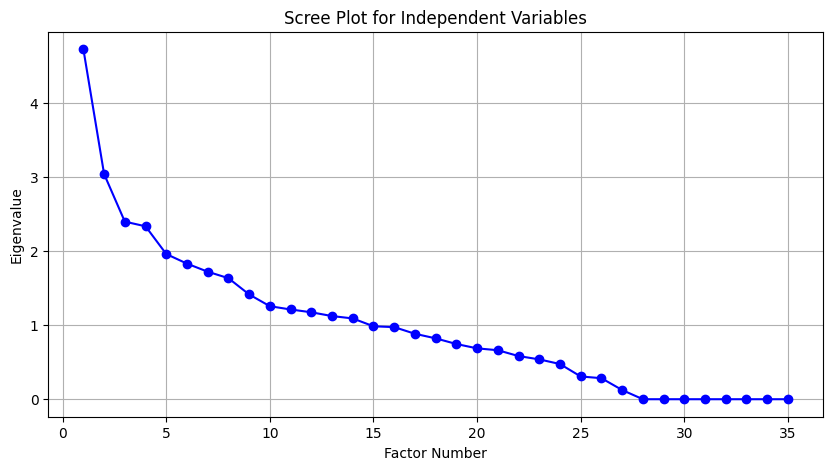

In [146]:
# Plot Scree Plot for independent variables
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eigenvalues_X) + 1), eigenvalues_X, 'o-', color='b')
plt.title('Scree Plot for Independent Variables')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Insights from 3.b) Distribution fitting via Standardization and Dimensionality Reduction via Factor analysis

The Factor Analysis came up with 3 Factors in total for the group of independent variables. Below we'll give an interpretation of each:

- Independent variables' table:

    - Factor 1 (first column of table "Factor Loadings for Independent Variables"): The top 5 original variables that most contribute to this Factor are Occupation_Student, Marital Status_Single, Monthly Income, Marital Status_Married & Age, meaning this Factor concentrates demographical characteristics of customers.
 
    - Factor 2 (second column of table "Factor Loadings for Independent Variables"): The top 5 original variables that most contribute to this Factor are Meal(P2)_ Dinner, Meal(P1)_Breakfast, Meal(P2)_ Snacks, Meal(P2)_ Lunch & Meal(P1)_Snacks, meaning this Factor concentrates customers' preferences for meals ordered.
 
    - Factor 3 (third column of table "Factor Loadings for Independent Variables"): The top 5 original variables that most contribute to this Factor are Order Time_Anytime (Mon-Sun), Order Time_Weekend (Sat & Sun), Medium (P1)_Food delivery apps, Medium (P1)_Walk-in & Meal(P1)_Breakfast, meaning this factor concentrates customers' times of order plus the mediums in which they order and yet another meal-preference.
 
The Scree Plot drawn shows that maintaining 3 Factors (and no more than 3) for the independent variables group already does mantain most of the original dataframe's variance in the newly-formed tables, and so 3 Factors will be kept.

## <ins>3.c) Canonical Correlation Analysis</ins>

The following Canonical Correlation Analysis (CCA) is a statistical method used to explore the relationship between two sets of variables, seeking to find linear combinations of variables on each set that are maximally correlated with each other. CCA compares the relationships between the variables in 2 data-groups (and no more than 2 groups), which again will be the 2 lists which partition our dataframe into dependent and independent variables. 

In [147]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2)
cca_X, cca_Y = cca.fit_transform(df_X_standardized, df_Y_standardized)

# Calculate and print canonical correlations
canonical_correlations = [np.corrcoef(cca_X[:, i], cca_Y[:, i])[0, 1] for i in range(cca_X.shape[1])]
print("Canonical Correlations (Direct CCA):\n", canonical_correlations)

Canonical Correlations (Direct CCA):
 [0.7661483499941516, 0.7003834491272154]


## Insights from 3.c) Canonical Correlation Analysis

There is a really strong correlation between the first column of "Canonical Variables for X" (cca_X) and the first column of "Canonical Variables for Y" (cca_Y), as given by the correlation factor of 0.766.

Similarly, there is a really strong correlation between the second column of "Canonical Variables for X" and the second column of "Canonical Variables for Y", as given by the correlation factor of 0.700.

Conversely, there are no significant correlations between the non-matching pairs of columns on "Canonical Variables for X" and "Canonical Variables for Y" (not for the first column of X and second column of Y nor for the second column of X and first column of Y).

Since the goal of Canonical Correlation Analyses, in general and also in this particular case, is to maximize the correlation of the diagonal canonical pairs (meaning the pairing of each table's first column and the pairing of each table's second column) and to minimize the correlation of the remaining pairs, we can conclude the CCA was carryied out successfully. 

# 4. Multivariate Analysis of Variance (MANOVA)

In [148]:
from statsmodels.multivariate.manova import MANOVA

# Define the independent and canonical variable names
independent_vars = df_X.columns.tolist()
canonical_vars = [f'Canonical_X_{i+1}' for i in range(cca_X.shape[1])]

# Concatenate the canonical and independent variables
canonical_and_independent = np.hstack((cca_X, df_X))

# Fit MANOVA model
manova = MANOVA(canonical_and_independent, df_Y)
print(manova.mv_test())

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
              x0           Value   Num DF  Den DF  F Value Pr > F
-----------------------------------------------------------------
             Wilks' lambda 0.8519 28.0000 323.0000  2.0054 0.0024
            Pillai's trace 0.1531 28.0000 323.0000  2.0860 0.0014
    Hotelling-Lawley trace 0.1680 28.0000 323.0000  1.9384 0.0037
       Roy's greatest root 0.1300 28.0000 323.0000  1.5001 0.0532
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
              x1           Value   Num DF  Den DF  F Value Pr > F
-----------------------------------------------------------------
             Wilks' lambda 0.5111 28.0000 323.0000 11.0358 0.0000
            Pillai's trace 0.6

## Insights from 4. Multivariate Analysis of Variance (MANOVA)

The conclusion from the MANOVA test is that changes in the independent variables, as a whole, do have a statistically significant effect on the dependent variables as whole, as understood by the great quantity of p-values shown that are less than 0.05. Therefore, a clear pivot from the demographical customer profile and their orders' characteristics would surely introduce changes in their opinions and preferences referrent to the service.

# 5. Machine Learning Model Predicting Customer Preferences and Opinions on the Service based on Order Attributes and Customer Demographics

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# Use cca_X (canonical variables for independent variables) to predict cca_Y (canonical variables for dependent variables)
X_final = cca_X
Y_final = df_Y

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.2, random_state=42)

# Initialize multivariate linear regression model
model = LinearRegression()

# Train the multivariate regression model on the canonical variables
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)  
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Print detailed performance metrics
for col in df_Y.columns:
    print(f"Performance for {col}:")
    col_index = df_Y.columns.get_loc(col)

    # Calculate metrics
    mse_col = mean_squared_error(Y_test.iloc[:, col_index], Y_pred[:, col_index])
    mae_col = mean_absolute_error(Y_test.iloc[:, col_index], Y_pred[:, col_index])
    rmse_col = mean_squared_error(Y_test.iloc[:, col_index], Y_pred[:, col_index], squared=False)
    r2_col = r2_score(Y_test.iloc[:, col_index], Y_pred[:, col_index])

    # Print metrics
    print(f"  Mean Squared Error: {mse_col}")
    print(f"  Mean Absolute Error: {mae_col}")
    print(f"  Root Mean Squared Error: {rmse_col}")
    print(f"  R-squared: {r2_col}")

# Calculate and print canonical correlations
canonical_correlations = [np.corrcoef(cca_X[:, i], cca_Y[:, i])[0, 1] for i in range(cca_X.shape[1])]
print("Canonical Correlations (Direct CCA):\n", canonical_correlations)

Mean Absolute Error: 1.5550887048662916
Mean Squared Error: 40.64909108509978
Root Mean Squared Error: 1.9221523425123217
R-squared: 0.026964048418866963
Performance for Ease and convenient:
  Mean Squared Error: 0.8588781714741163
  Mean Absolute Error: 0.6829514521296459
  Root Mean Squared Error: 0.9267568027665706
  R-squared: -0.023587619049662
Performance for Time saving:
  Mean Squared Error: 0.9782437004580288
  Mean Absolute Error: 0.8174949381496452
  Root Mean Squared Error: 0.989062030642178
  R-squared: -0.0019586992570110873
Performance for More restaurant choices:
  Mean Squared Error: 1.0303067837491677
  Mean Absolute Error: 0.8220104623567408
  Root Mean Squared Error: 1.0150402867616475
  R-squared: -0.09281493590131373
Performance for Easy Payment option:
  Mean Squared Error: 1.167053808813683
  Mean Absolute Error: 0.9150769313588373
  Root Mean Squared Error: 1.0803026468604449
  R-squared: -0.07256123456532437
Performance for More Offers and Discount:
  Mean Squ

## Insights from 5. Machine Learning Model Predicting Customer Preferences and Opinions on the Service based on Order Attributes and Customer Demographics

An accurate prediction of the Customers' Opinion of the Service (i.e.: Customer on upcoming order A will, in all likelihood, strongly agree that the service is easy and convenient) and Customers' Preferences (i.e. Customer on upcoming order A will, in all likelihood, find Less Delivery Time Very Important) can prepare restaurants, given they're previewed this info, to pivot their service to accommodate for customers' preferences and to assuage their criticisms.

As an overall assessment of the Machine Learning model, we can say:

Mean Absolute Error: 1.5 --> this means that, on average, the model's predictions are off by about 1,5 units which, considering our once-categorical-turned-numerical variables range from numbers in the ball-park of -2 to 2, Customer Overall Review rating ranges from -150 to roughly 150 and its clusterized-version column ranges from 0 to 4, we can say the model's performance is acceptable in this metric.

Mean Squared Error: 40.6 --> this means that, on average, the squared differences between the predicted and actual values are 40,6. Considering this metric gives more weight to the errors (vs the immediately preceeding metric) I'd say a 40,6 mean squared error is consistent with an acceptable model performance.

Root Mean Squared Error: 1.9 --> this means that the square root of the mean squared error is 1,9, again indicating an acceptably-performing model.

R-squared: 0.027 --> this means that only 2,7% of the variance in the dependent variables is explained by the independent variables in the model.

Overall, the model predicts dependent variables with an acceptable accuracy, but it should be noted that the model's poor r-squared result means the model does have ample room for improvement.